In [1]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

-------------------------------------------------
----- Environment variables from .env file: -----
-------------------------------------------------
-------------------------------------------------


In [2]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [3]:
#Start with spring and work our way down to winter
season = 1
season_year = 2012
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2012-03-01 to 2012-05-31
Columns: 281 entries, 10000009 to 9000015
dtypes: float64(281)
memory usage: 202.7 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2012-03-01  1.241353  0.751398  0.566400  0.967355  0.606233  0.596793   
2012-03-02  1.155925  0.720505  0.512038  0.928689  0.578620  0.569610   
2012-03-03  1.089606  0.701690  0.473741  0.886629  0.561302  0.552562   
2012-03-04  1.047073  0.691151  0.452784  0.861901  0.561700  0.552953   
2012-03-05  0.999741  0.715126  0.430838  0.846132  0.553737  0.545115   
...              ...       ...       ...       ...       ...       ...   
2012-05-27  0.610967  0.471070  0.267969  0.625303  0.380613  0.374686   
2012-05-28  0.616914  0.465310  0.264376  0.613931  0.376563  0.370700   
2012-05-29  0.620091  0.495049  0.284127  0.626471  0.384933  0.378939   
2012-05-30  0.631118  0.490071  0.268824  0.612874  0.380052  0.374134   
2012-05-31  0.623825  0.479980  0.254620  0.606394  0.371422  0.365638   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2012-03-01  1.668360  1.454832  

          2012-03-01  2012-03-02  2012-03-03  2012-03-04  2012-03-05  \
10000009    0.002316   -0.006138    0.007920    0.018695    0.022584   
10000010   -0.512922   -0.496012   -0.461369   -0.437301   -0.362724   
10000011   -0.707468   -0.730550   -0.737133   -0.742687   -0.747590   
10000014   -0.285822   -0.261793   -0.237635   -0.218541   -0.185371   
10000016   -0.665579   -0.655641   -0.631205   -0.603148   -0.581211   
...              ...         ...         ...         ...         ...   
67000019    2.697829    2.342330    1.987695    1.751537    1.487694   
7000003     0.411310    0.332123    0.243146    0.180890    0.085324   
8000001     0.159574    0.116883    0.092733    0.101734    0.071354   
9000001     0.382525    0.466636    0.564582    0.646973    0.739783   
9000015     0.325015    0.407690    0.503937    0.584097    0.674267   

          2012-03-06  2012-03-07  2012-03-08  2012-03-09  2012-03-10  ...  \
10000009    0.028949    0.019006    0.060977    0.141961  

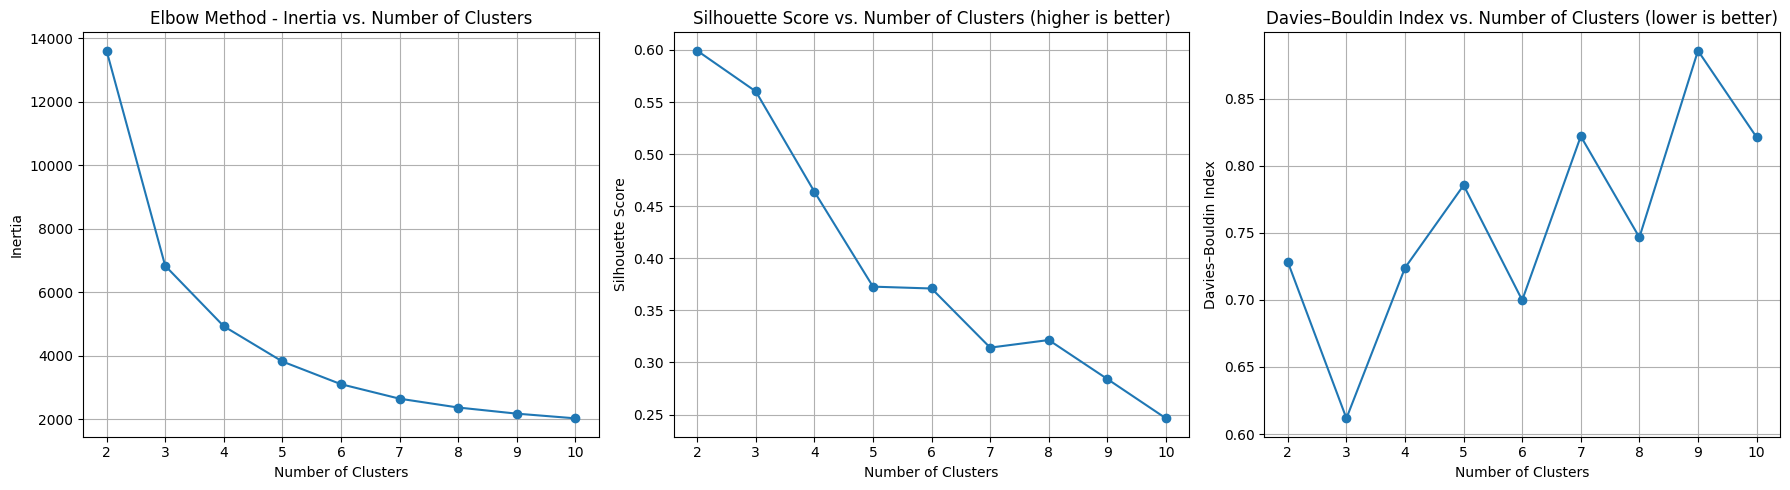

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2012-03-01  1.241353  0.751398  0.566400  0.967355  0.606233  0.596793   
2012-03-02  1.155925  0.720505  0.512038  0.928689  0.578620  0.569610   
2012-03-03  1.089606  0.701690  0.473741  0.886629  0.561302  0.552562   
2012-03-04  1.047073  0.691151  0.452784  0.861901  0.561700  0.552953   
2012-03-05  0.999741  0.715126  0.430838  0.846132  0.553737  0.545115   
...              ...       ...       ...       ...       ...       ...   
2012-05-27  0.610967  0.471070  0.267969  0.625303  0.380613  0.374686   
2012-05-28  0.616914  0.465310  0.264376  0.613931  0.376563  0.370700   
2012-05-29  0.620091  0.495049  0.284127  0.626471  0.384933  0.378939   
2012-05-30  0.631118  0.490071  0.268824  0.612874  0.380052  0.374134   
2012-05-31  0.623825  0.479980  0.254620  0.606394  0.371422  0.365638   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2012-03-01  1.668360  1.454832  

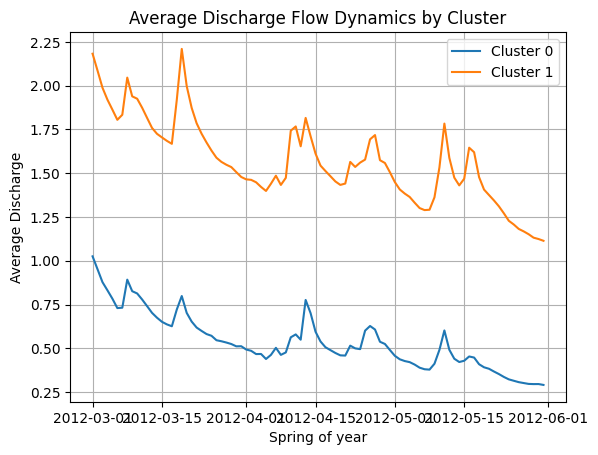

In [5]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [7]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2012-03-01  1.241353  0.751398  0.566400  0.967355  0.606233  0.596793   
2012-03-02  1.155925  0.720505  0.512038  0.928689  0.578620  0.569610   
2012-03-03  1.089606  0.701690  0.473741  0.886629  0.561302  0.552562   
2012-03-04  1.047073  0.691151  0.452784  0.861901  0.561700  0.552953   
2012-03-05  0.999741  0.715126  0.430838  0.846132  0.553737  0.545115   
...              ...       ...       ...       ...       ...       ...   
2012-05-27  0.610967  0.471070  0.267969  0.625303  0.380613  0.374686   
2012-05-28  0.616914  0.465310  0.264376  0.613931  0.376563  0.370700   
2012-05-29  0.620091  0.495049  0.284127  0.626471  0.384933  0.378939   
2012-05-30  0.631118  0.490071  0.268824  0.612874  0.380052  0.374134   
2012-05-31  0.623825  0.479980  0.254620  0.606394  0.371422  0.365638   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2012-03-01  1.668360  1.454832  0.858399  1.292112  ...  1.112084  2.266078   
2012-03-02  1.639952  1.345206  0.787934  1.166602  ...  0.978083  1.965374   
2012-03-03  1.596113  1.237284  0.739293  1.079964  ...  0.866805  1.694388   
2012-03-04  1.546833  1.180839  0.715747  1.038024  ...  0.784717  1.540319   
2012-03-05  1.522385  1.175165  0.685414  0.983996  ...  0.693602  1.392898   
...              ...       ...       ...       ...  ...       ...       ...   
2012-05-27  0.951935  0.746737  0.608597  0.384067  ...  0.094380  0.153112   
2012-05-28  0.912996  0.739459  0.608432  0.406730  ...  0.090828  0.150741   
2012-05-29  0.882986  0.735725  0.597085  0.421418  ...  0.126836  0.148269   
2012-05-30  0.844404  0.718051  0.588453  0.398505  ...  0.076193  0.141334   
2012-05-31  0.807693  0.743957  0.582069  0.393802  ...  0.068573  0.143075   

            66000034  67000017  67000018  67000019   7000003   8000001  \
2012-03-01  5.274687  2.340977  2.217609  3.804589  1.630276  1.390893   
2012-03-02  4.520932  2.045561  1.792755  3.243342  1.456586  1.265271   
2012-03-03  3.844130  1.778021  1.420152  2.726099  1.284045  1.159713   
2012-03-04  3.450888  1.622721  1.233116  2.399628  1.173674  1.111889   
2012-03-05  3.091840  1.467208  1.107920  2.081972  1.046086  1.035766   
...              ...       ...       ...       ...       ...       ...   
2012-05-27  0.570831  0.081270  0.150756  0.101742  0.318051  0.412897   
2012-05-28  0.558423  0.076345  0.143345  0.086004  0.304503  0.405444   
2012-05-29  0.542610  0.072169  0.133979  0.071739  0.317658  0.438465   
2012-05-30  0.534687  0.069218  0.129320  0.066738  0.304656  0.411750   
2012-05-31  0.521719  0.065964  0.121743  0.065389  0.287370  0.396097   

             9000001   9000015  
2012-03-01  1.602904  1.548216  
2012-03-02  1.576146  1.523753  
2012-03-03  1.549746  1.499616  
2012-03-04  1.537470  1.488393  
2012-03-05  1.529514  1.481119  
...              ...       ...  
2012-05-27  1.011617  1.007629  
2012-05-28  0.997655  0.994865  
2012-05-29  0.988150  0.986175  
2012-05-30  1.000179  0.997173  
2012-05-31  0.971638  0.971079  

[92 rows x 281 columns]

<Axes: >

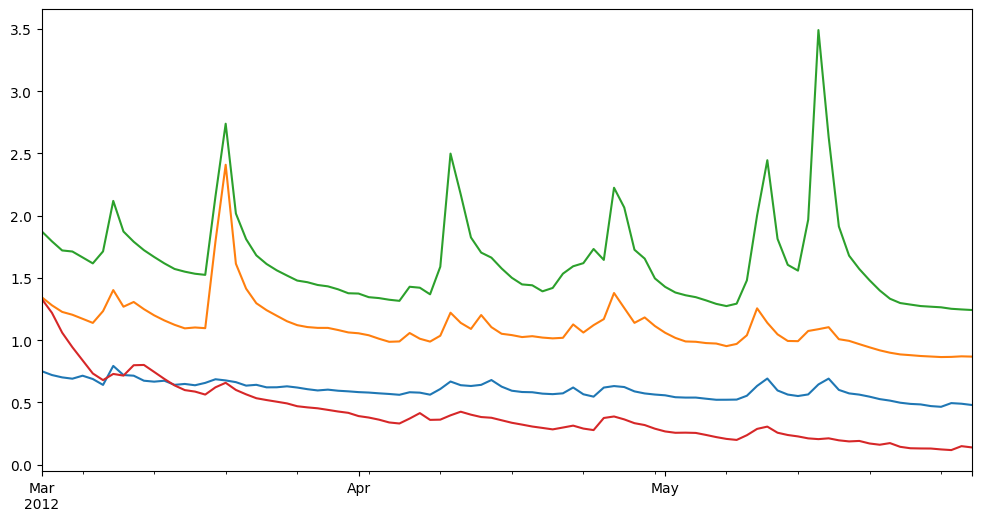

In [8]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

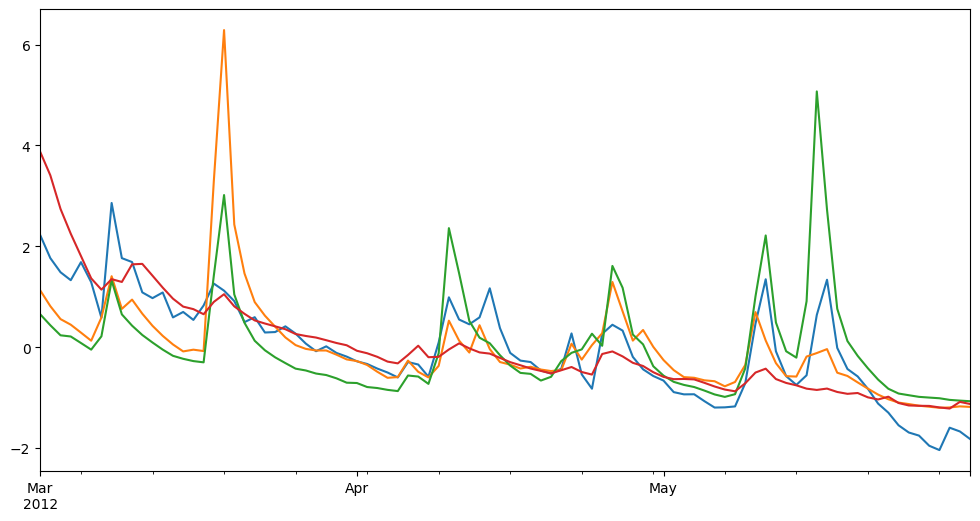

In [9]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

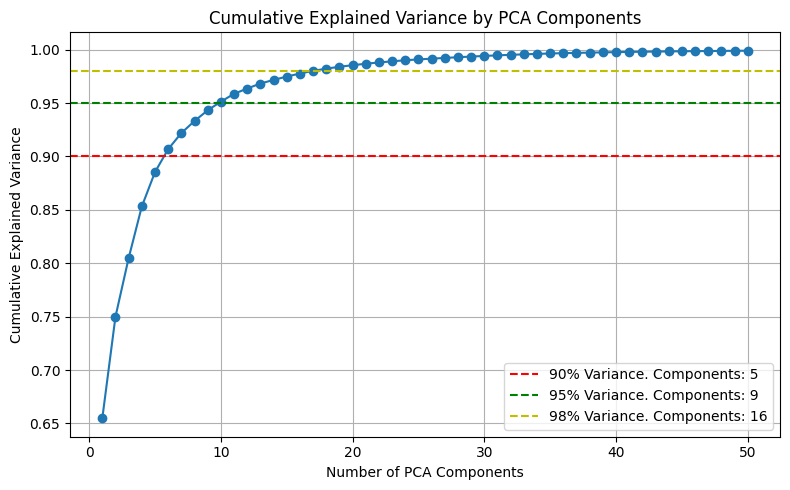

In [10]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 3.87787114e+01, -1.22904868e+01,  3.70756244e+00, ...,
        -1.51394589e+00,  9.13078093e-01,  2.34258116e-01],
       [ 3.27538867e+01, -1.18846652e+01,  2.33585853e+00, ...,
        -6.09044043e-01,  3.48786740e-03,  3.04866411e-01],
       [ 2.68260672e+01, -1.09961349e+01,  8.58662096e-01, ...,
        -2.45602933e-02, -1.42599732e-02, -2.15771022e-01],
       ...,
       [-2.21438754e+01, -4.33385361e+00, -1.27422385e+00, ...,
        -5.27279267e-01, -4.05323733e-01, -4.81616984e-01],
       [-2.22354038e+01, -4.72714498e+00, -1.16477321e+00, ...,
        -5.53185517e-01, -6.84236008e-01, -8.40775314e-02],
       [-2.28006907e+01, -4.94329161e+00, -1.27226065e+00, ...,
        -5.99072921e-01, -8.61427549e-01, -1.14636103e-01]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_39220\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


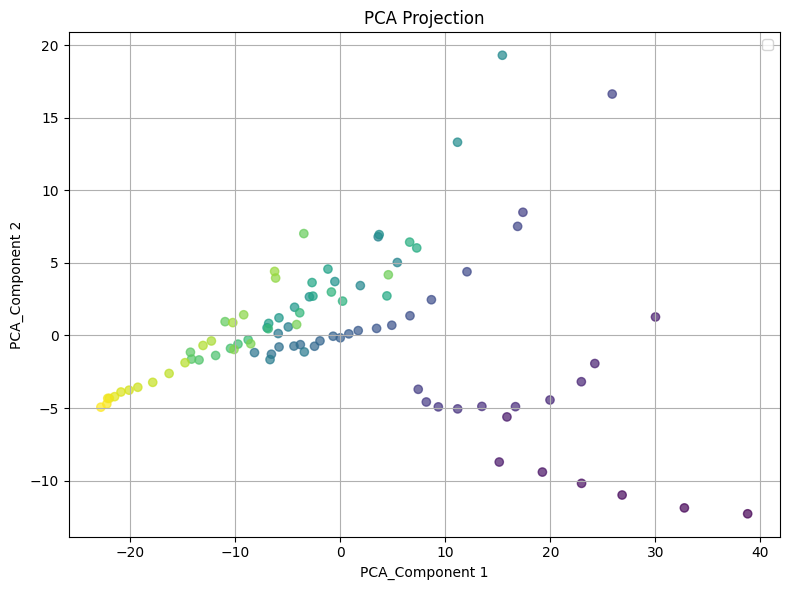

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_39220\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


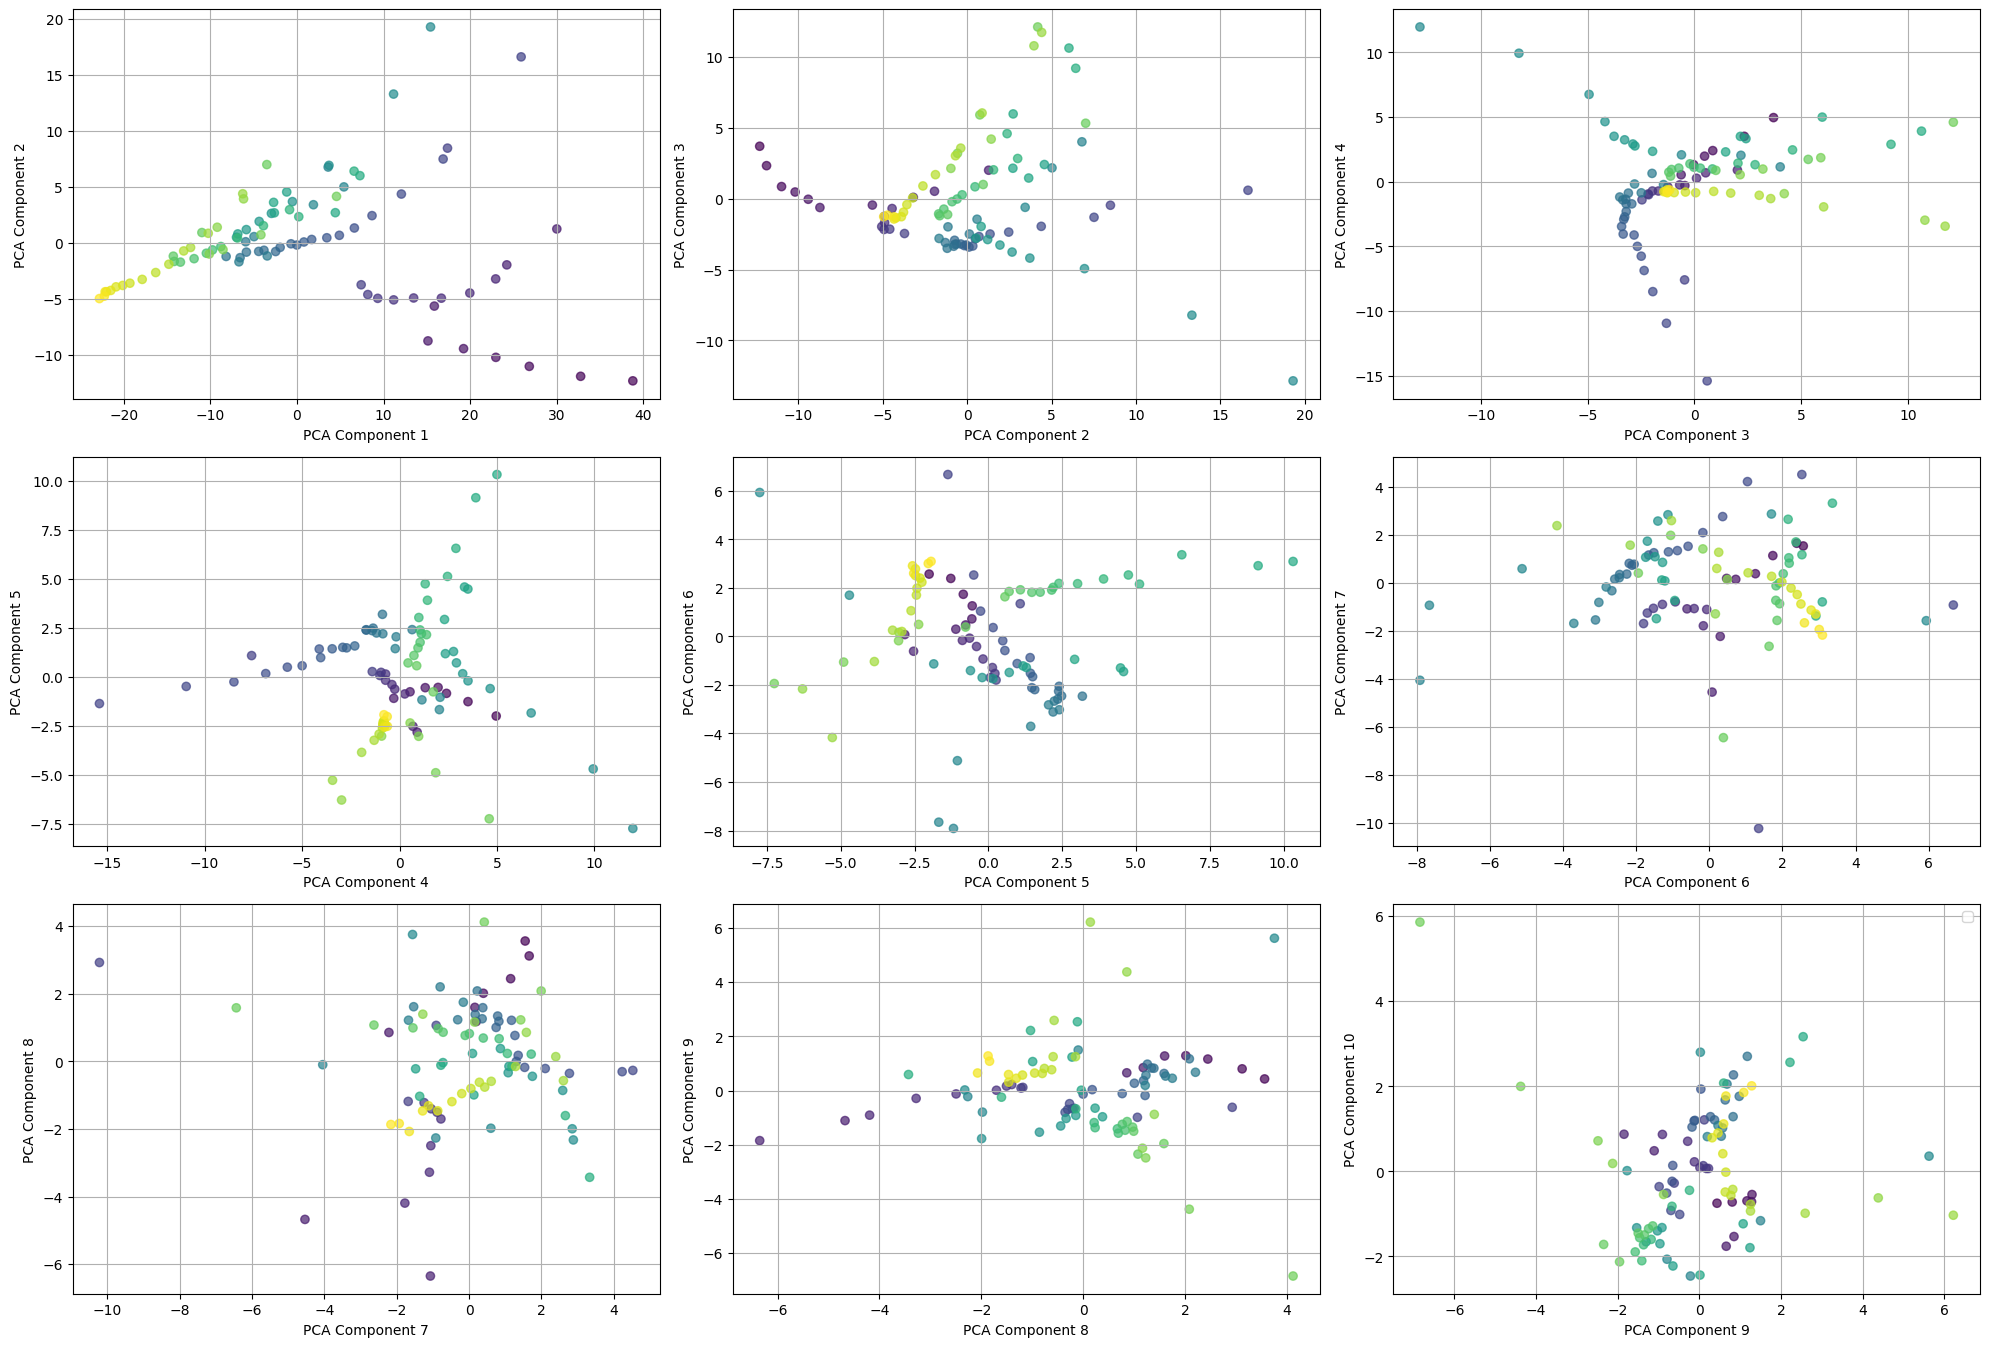

In [13]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.262
KMeans Davies-Bouldin Index is 1.340


<Axes: xlabel='k'>

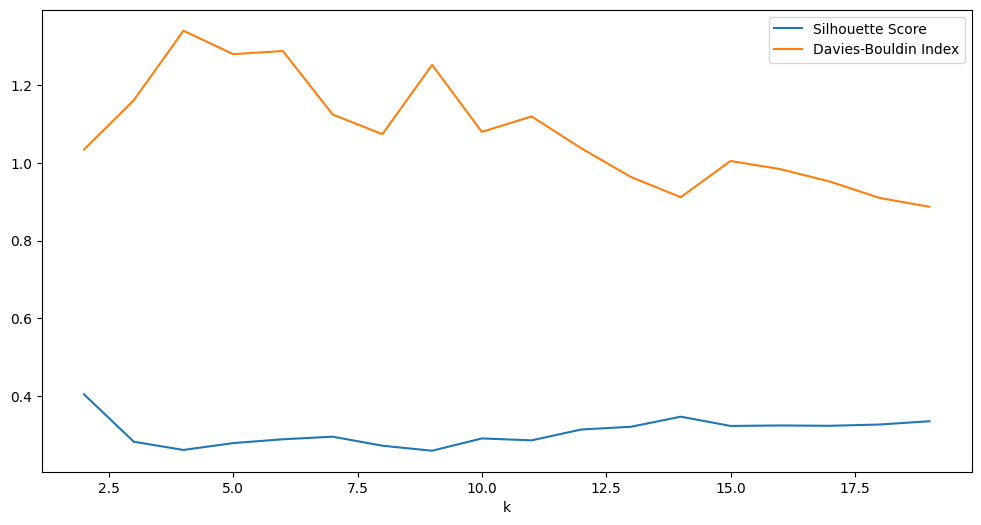

In [15]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         2     85          0.167627   
4    1.52            3         4     79         -0.080373   
5    1.78            3         3     78         -0.040872   
6    2.03            3         5     66         -0.132163   
7    2.29            3         6     58         -0.064266   
8    2.54            3         6     54         -0.017741   
9    2.80            3         6     47          0.043460   
10   3.05            3         6     47          0.043460   
11   3.31            3         6     44          0.060627   
12   3.56            3         5     43          0.046296   
13   3.82            3         5     40          0.069083   
14   4.07            3         5     39          0.076816   
15   4.33            3         7     29          0.117404   
16   4.58            3         7     27          0.125715   
17   4.84            3         8     23          0.138417   
18   5.09            3         8     20          0.138706   
19   5.35            3         8     20          0.138706   
20   5.60            3         7     20          0.141354   
21   5.86            3         7     20          0.141354   
22   6.11            3         6     20          0.132367   
23   6.37            3         5     20          0.144298   
24   6.62            3         4     19          0.031387   
25   6.88            3         4     17          0.039727   
26   7.13            3         3     15          0.072657   
27   7.39            3         2     15          0.351939   
28   7.64            3         2     15          0.351939   
29   7.90            3         3     12          0.189364   
30   8.15            3         3     12          0.189364   
31   8.41            3         3     12          0.189364   
32   8.66            3         2     12         -0.003562   
33   8.92            3         1     12               NaN   
34   9.17            3         1     12               NaN   
35   9.43            3         1     11               NaN   
36   9.68            3         1     11               NaN   
37   9.94            3         1     11               NaN   
38  10.19            3         1      9               NaN   
39  10.45            3         1      6               NaN   
40  10.70            3         1      6               NaN   
41  10.96            3         1      6               NaN   
42  11.21            3         1      5               NaN   
43  11.47            3         1      5               NaN   
44  11.72            3         1      5               NaN   
45  11.98            3         1      5               NaN   
46  12.23            3         1      5               NaN   
47  12.49            3         1      5               NaN   
48  12.74            3         1      4               NaN   
49  13.00            3         1      4               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               0.628106  
4               0.877769  
5               0.931828  
6               1.561857  
7               1.518314  
8               1.555657  
9               1.615905  
10              1.615905  
11              1.623452  
12              1.610005  
13              1.607227  
14              1.585277  
15              1.558809  
16              1.536989  
17              1.435699  
18              1.455574  
19              1.455574  
20              1.528285  
21              1.528285  
22              1.572833  
23              1.630221  
24              1.690570  
25              1.589448  
26              1.499740  
27              1.527416  
28              1.527416  
29              1.762744  
30              1.762744  
31              1.762744  
32 

<Axes: xlabel='eps'>

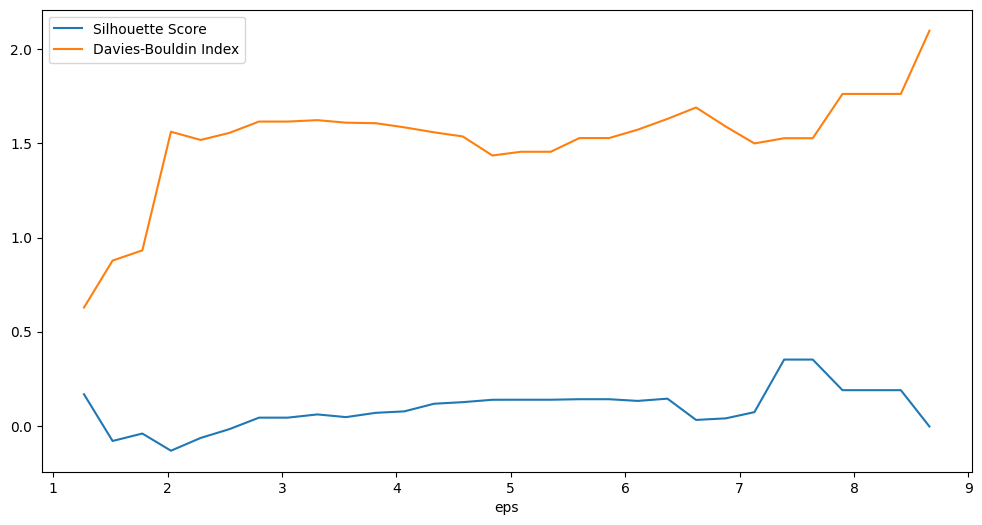

In [16]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

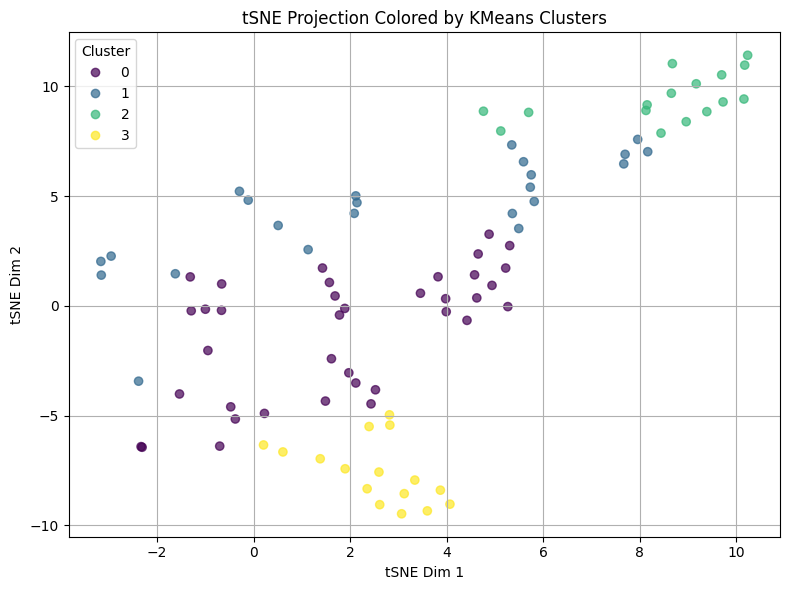

In [17]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    269          0.996236   
1    0.05            2         6    269          0.996236   
2    0.06            2         6    269          0.996236   
3    0.06            2         6    269          0.996236   
4    0.07            2         7    267          0.995428   
..    ...          ...       ...    ...               ...   
195  0.98            2        22     89          0.006405   
196  0.99            2        21     89         -0.005083   
197  0.99            2        21     89         -0.005083   
198  1.00            2        21     88         -0.003859   
199  1.00            2        21     87         -0.004281   

     Davies-Bouldin Index  
0                0.005688  
1                0.005688  
2                0.005688  
3                0.005688  
4                0.005707  
..                    ...  
195              0.655463  
196              0.695528  
197              0.695528  
198              0.691330  
199              0.691290  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

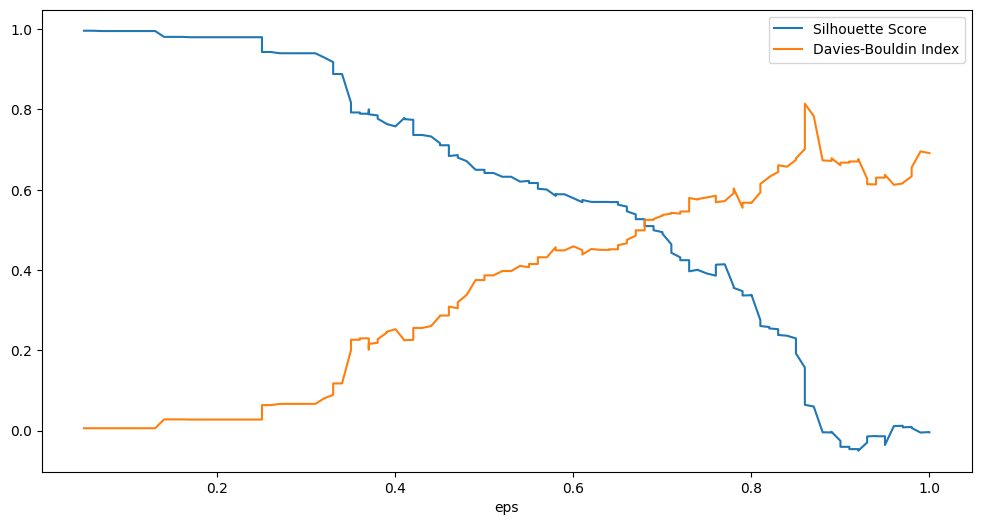

In [18]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [19]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [20]:
#Start with spring and work our way down to winter
season = 2
season_year = 2012
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2012-06-01 to 2012-08-31
Columns: 276 entries, 10000009 to 9000015
dtypes: float64(276)
memory usage: 199.1 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2012-06-01  0.622749  0.481443  0.258640  0.597252  0.398062  0.391863   
2012-06-02  0.634053  0.570385  0.363246  0.609573  0.435836  0.429050   
2012-06-03  0.630762  0.518919  0.289452  0.601791  0.386987  0.380961   
2012-06-04  0.613685  0.479717  0.258832  0.597082  0.378377  0.372485   
2012-06-05  0.605520  0.481697  0.245812  0.575001  0.367961  0.362231   
...              ...       ...       ...       ...       ...       ...   
2012-08-27  0.831371  0.572124  0.225799  0.588514  0.397620  0.391428   
2012-08-28  0.777047  0.540632  0.218833  0.611514  0.387033  0.381006   
2012-08-29  0.693510  0.565609  0.246828  0.633817  0.390657  0.384574   
2012-08-30  0.659933  0.564569  0.230167  0.633247  0.385211  0.379212   
2012-08-31  0.641060  0.571469  0.222278  0.631531  0.374487  0.368656   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2012-06-01  0.788312  0.815405  

          2012-06-01  2012-06-02  2012-06-03  2012-06-04  2012-06-05  \
10000009    0.435727    0.408412    0.471859    0.459624    0.461729   
10000010    0.096988    0.256522    0.196945    0.129233    0.154681   
10000011   -0.437115   -0.237644   -0.367092   -0.415513   -0.430256   
10000014    0.374605    0.350011    0.400648    0.418677    0.386050   
10000016   -0.102893   -0.064467   -0.127346   -0.120691   -0.127356   
...              ...         ...         ...         ...         ...   
67000019   -0.913379   -0.980483   -0.972454   -0.961773   -0.958753   
7000003    -0.372949   -0.158553   -0.134408   -0.223388   -0.275475   
8000001    -0.121493   -0.093785   -0.018371   -0.043103   -0.049774   
9000001     1.213560    1.155622    1.259722    1.291592    1.218986   
9000015     1.217237    1.159274    1.262637    1.294569    1.230514   

          2012-06-06  2012-06-07  2012-06-08  2012-06-09  2012-06-10  ...  \
10000009    0.443214    0.441649    0.297825    0.489646  

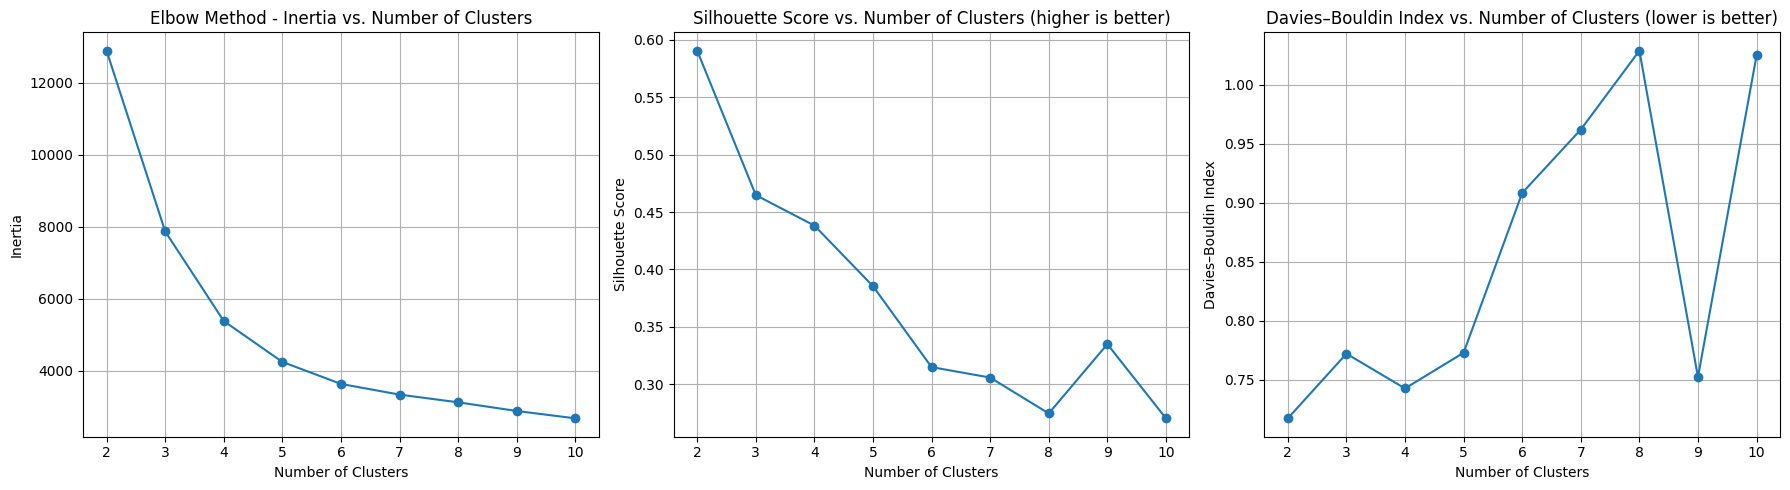

In [21]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        1
10000014        2
10000016        1

            10000009  10000010  10000011  10000014  10000016  10000017  \
2012-06-01  0.622749  0.481443  0.258640  0.597252  0.398062  0.391863   
2012-06-02  0.634053  0.570385  0.363246  0.609573  0.435836  0.429050   
2012-06-03  0.630762  0.518919  0.289452  0.601791  0.386987  0.380961   
2012-06-04  0.613685  0.479717  0.258832  0.597082  0.378377  0.372485   
2012-06-05  0.605520  0.481697  0.245812  0.575001  0.367961  0.362231   
...              ...       ...       ...       ...       ...       ...   
2012-08-27  0.831371  0.572124  0.225799  0.588514  0.397620  0.391428   
2012-08-28  0.777047  0.540632  0.218833  0.611514  0.387033  0.381006   
2012-08-29  0.693510  0.565609  0.246828  0.633817  0.390657  0.384574   
2012-08-30  0.659933  0.564569  0.230167  0.633247  0.385211  0.379212   
2012-08-31  0.641060  0.571469  0.222278  0.631531  0.374487  0.368656   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2012-06-01  0.788312  0.815405  

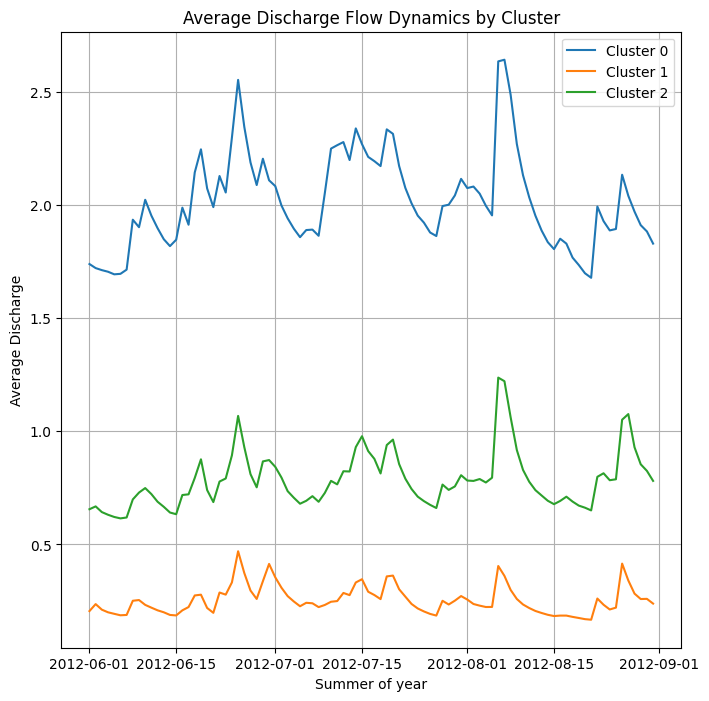

In [22]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [24]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2012-06-01  0.622749  0.481443  0.258640  0.597252  0.398062  0.391863   
2012-06-02  0.634053  0.570385  0.363246  0.609573  0.435836  0.429050   
2012-06-03  0.630762  0.518919  0.289452  0.601791  0.386987  0.380961   
2012-06-04  0.613685  0.479717  0.258832  0.597082  0.378377  0.372485   
2012-06-05  0.605520  0.481697  0.245812  0.575001  0.367961  0.362231   
...              ...       ...       ...       ...       ...       ...   
2012-08-27  0.831371  0.572124  0.225799  0.588514  0.397620  0.391428   
2012-08-28  0.777047  0.540632  0.218833  0.611514  0.387033  0.381006   
2012-08-29  0.693510  0.565609  0.246828  0.633817  0.390657  0.384574   
2012-08-30  0.659933  0.564569  0.230167  0.633247  0.385211  0.379212   
2012-08-31  0.641060  0.571469  0.222278  0.631531  0.374487  0.368656   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2012-06-01  0.788312  0.815405  0.575726  0.411599  ...  0.065990  0.141617   
2012-06-02  0.758560  0.726540  0.570751  0.438897  ...  0.061933  0.130783   
2012-06-03  0.729382  0.703720  0.566191  0.426585  ...  0.055479  0.123769   
2012-06-04  0.703970  0.699637  0.561963  0.402717  ...  0.053475  0.119663   
2012-06-05  0.681872  0.682533  0.552336  0.374602  ...  0.049121  0.120630   
...              ...       ...       ...       ...  ...       ...       ...   
2012-08-27  0.509708  0.670841  0.397454  0.414909  ...  0.032074  0.065093   
2012-08-28  0.506700  0.600940  0.394066  0.457800  ...  0.028039  0.058739   
2012-08-29  0.516597  0.585542  0.420008  0.553262  ...  0.031997  0.058742   
2012-08-30  0.519216  0.583657  0.424855  0.504221  ...  0.026861  0.085364   
2012-08-31  0.521537  0.555247  0.412986  0.473541  ...  0.027906  0.827896   

            66000034  67000017  67000018  67000019   7000003   8000001  \
2012-06-01  0.516389  0.062664  0.118646  0.059965  0.285408  0.390303   
2012-06-02  0.502599  0.060521  0.110703  0.051870  0.396398  0.423547   
2012-06-03  0.482177  0.062559  0.099077  0.043173  0.384115  0.431322   
2012-06-04  0.471767  0.054192  0.093235  0.037332  0.336735  0.409838   
2012-06-05  0.458678  0.050640  0.085972  0.032686  0.308230  0.399247   
...              ...       ...       ...       ...       ...       ...   
2012-08-27  0.344467  0.020960  0.027939  0.010958  0.309996  0.381893   
2012-08-28  0.334449  0.020009  0.023543  0.010958  0.304935  0.372825   
2012-08-29  0.330477  0.020614  0.021847  0.010958  0.312741  0.378897   
2012-08-30  0.368566  0.024983  0.041128  0.012546  0.313157  0.371972   
2012-08-31  0.567393  0.044173  0.150415  0.122872  0.338833  0.378790   

             9000001   9000015  
2012-06-01  0.947224  0.948758  
2012-06-02  0.947261  0.948792  
2012-06-03  0.951288  0.952474  
2012-06-04  0.951035  0.952242  
2012-06-05  0.910896  0.915546  
...              ...       ...  
2012-08-27  0.774973  0.791277  
2012-08-28  0.688983  0.712660  
2012-08-29  0.676768  0.701493  
2012-08-30  0.796467  0.810928  
2012-08-31  0.729061  0.749302  

[92 rows x 276 columns]

<Axes: >

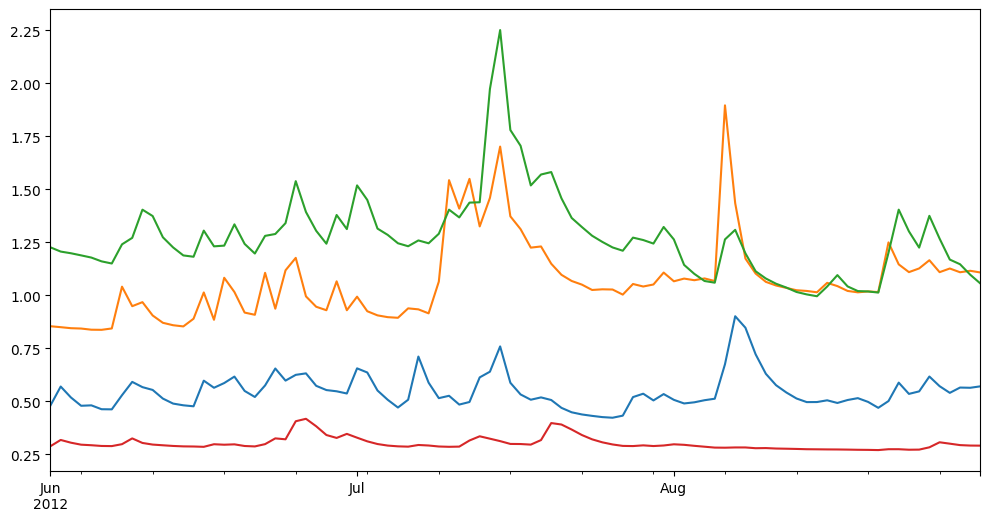

In [25]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

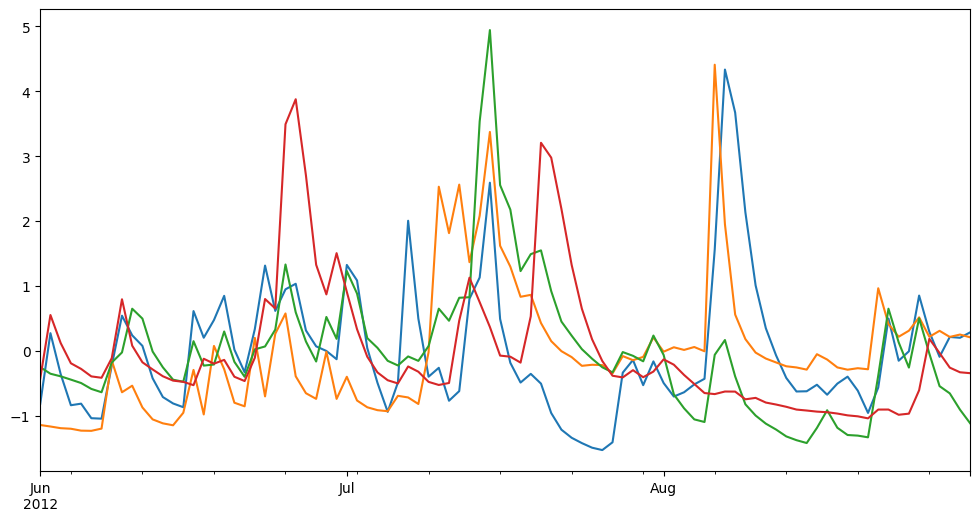

In [26]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

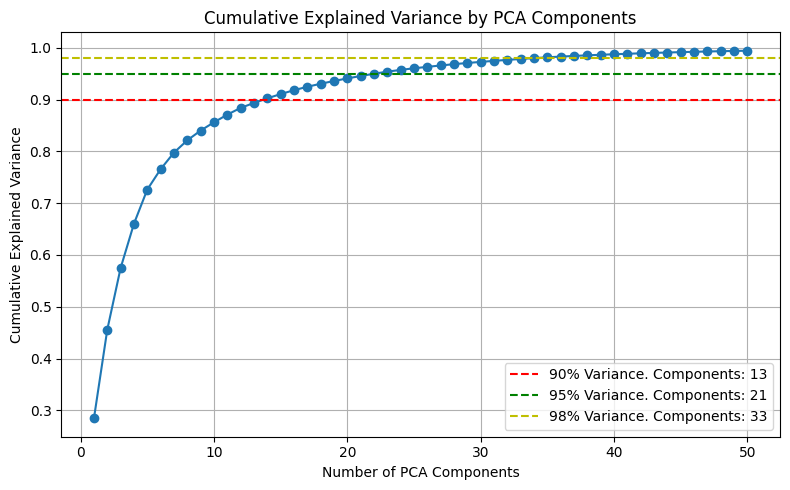

In [27]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-7.41015999,  6.63038276, -1.99435708, ...,  0.15105294,
         1.69039278, -0.82887182],
       [-5.25333889,  9.26625217, -1.84903621, ...,  0.16936257,
        -1.32789074, -0.20405177],
       [-7.52628814,  7.51400682, -2.32710165, ...,  0.65613709,
         0.17869296, -0.72931772],
       ...,
       [ 0.84817412, -6.64249515, -9.49324403, ...,  0.66233636,
         0.26511169,  0.24304938],
       [-0.398744  , -4.06817297, -8.03559366, ...,  0.62909815,
         0.10933704,  0.98033731],
       [-2.46482397, -3.65257546, -6.8863268 , ...,  3.76793742,
         2.88373948,  0.13671174]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_39220\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


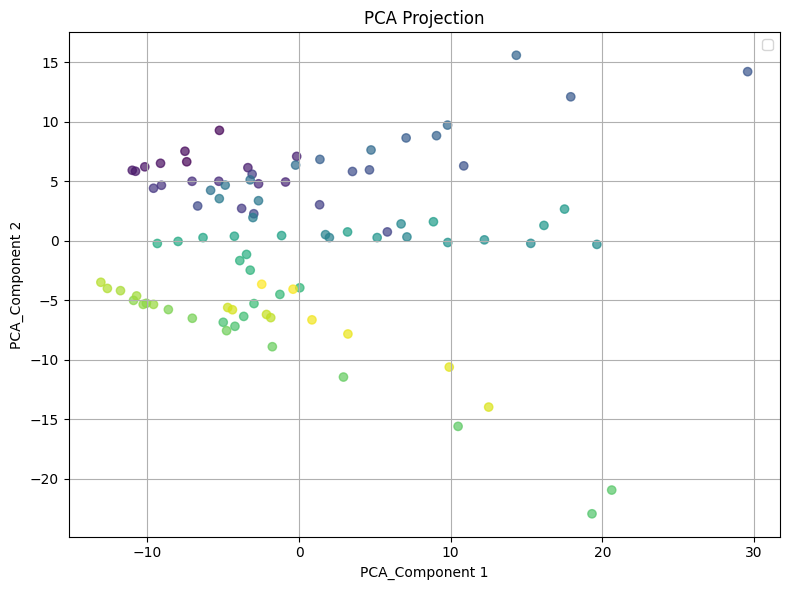

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_39220\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


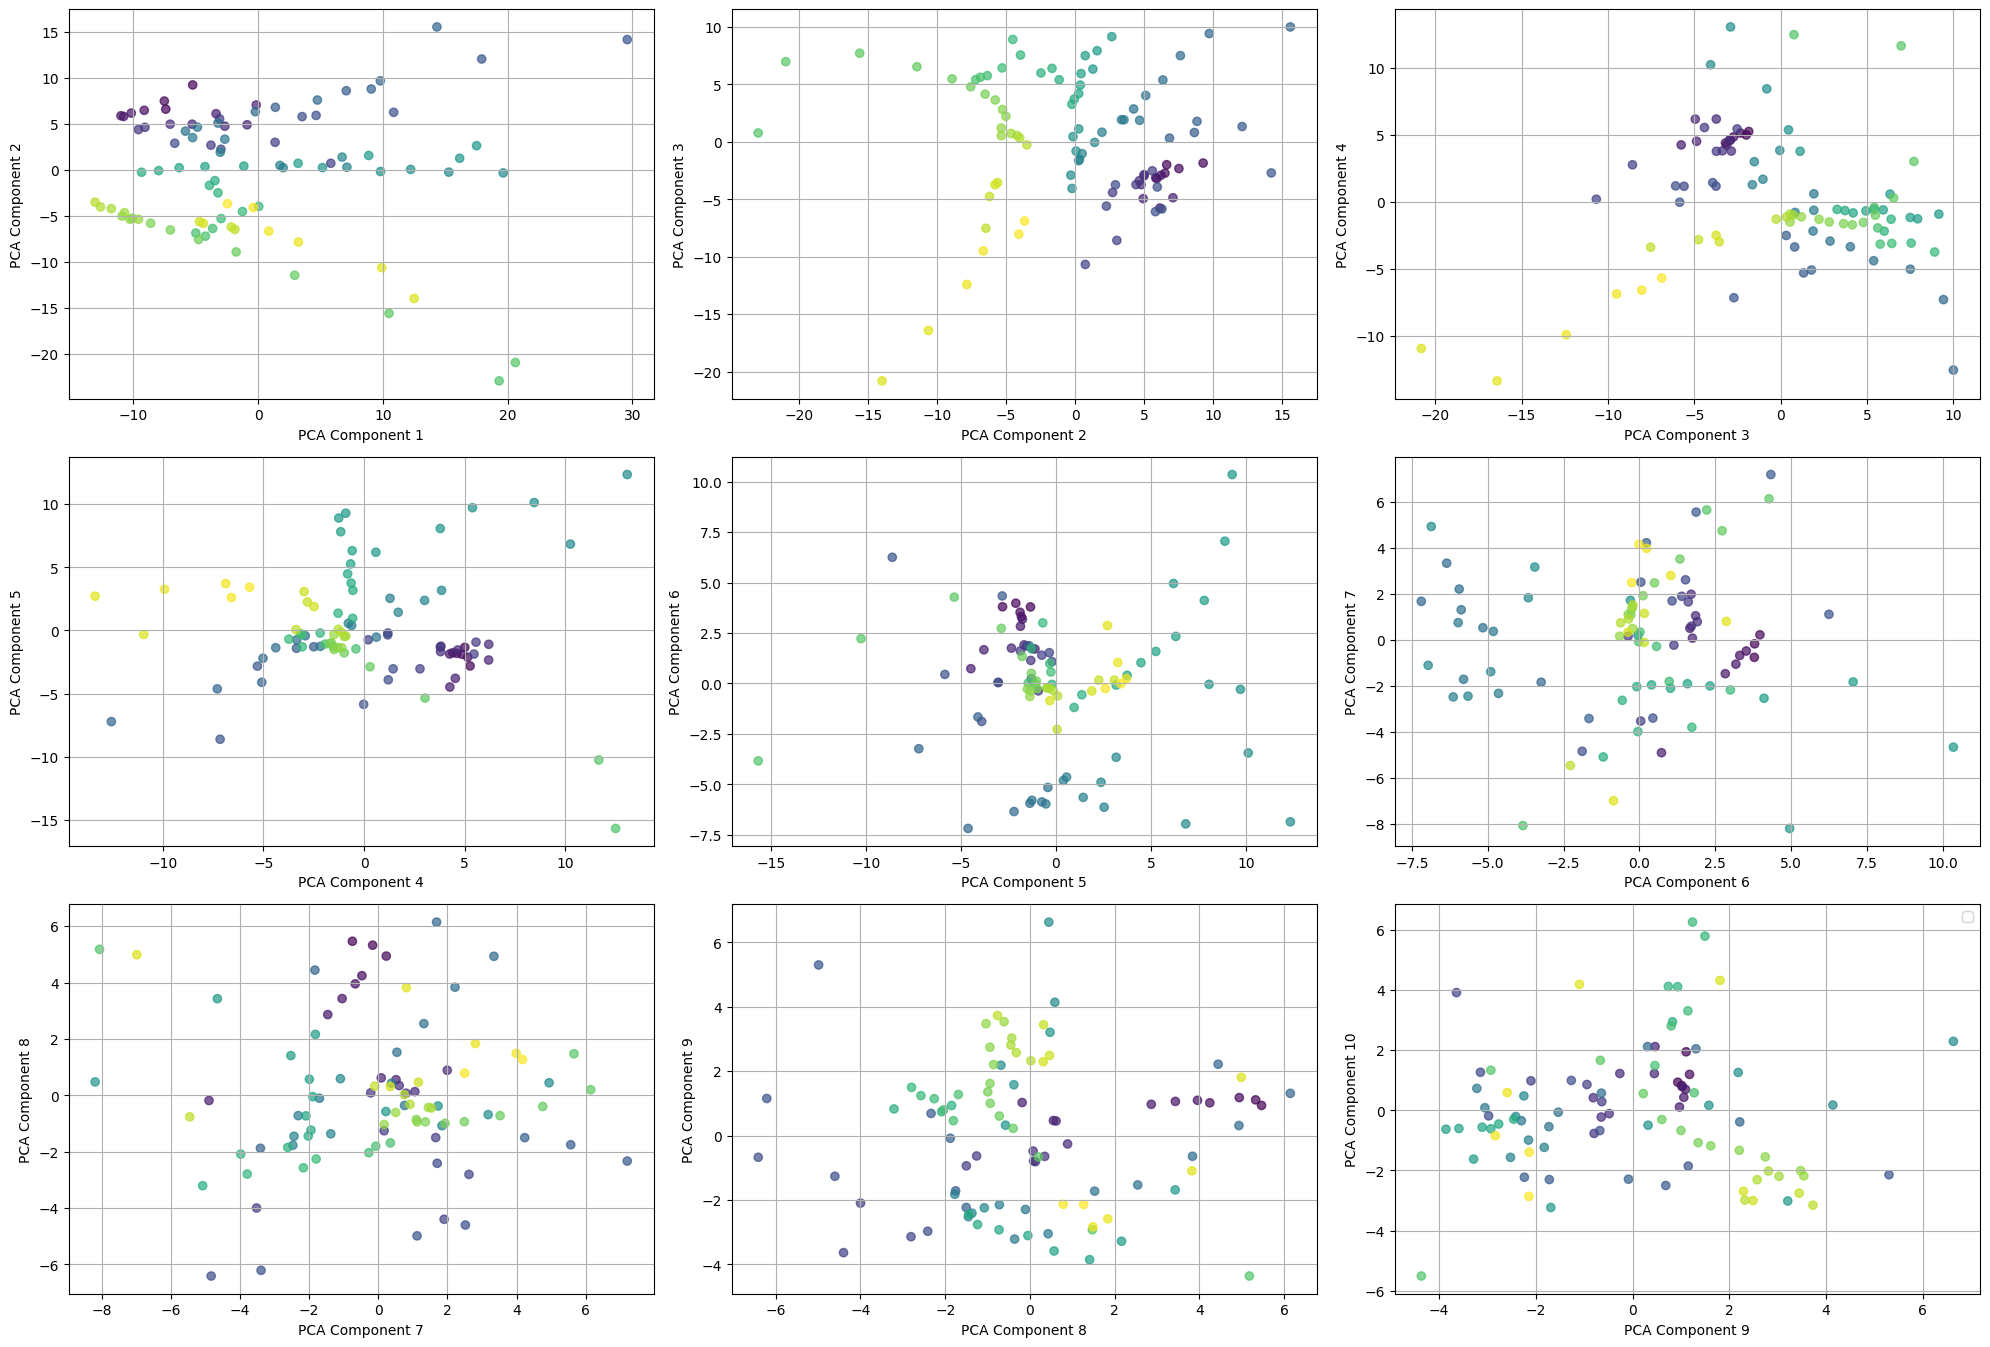

In [30]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.189
KMeans Davies-Bouldin Index is 1.596


<Axes: xlabel='k'>

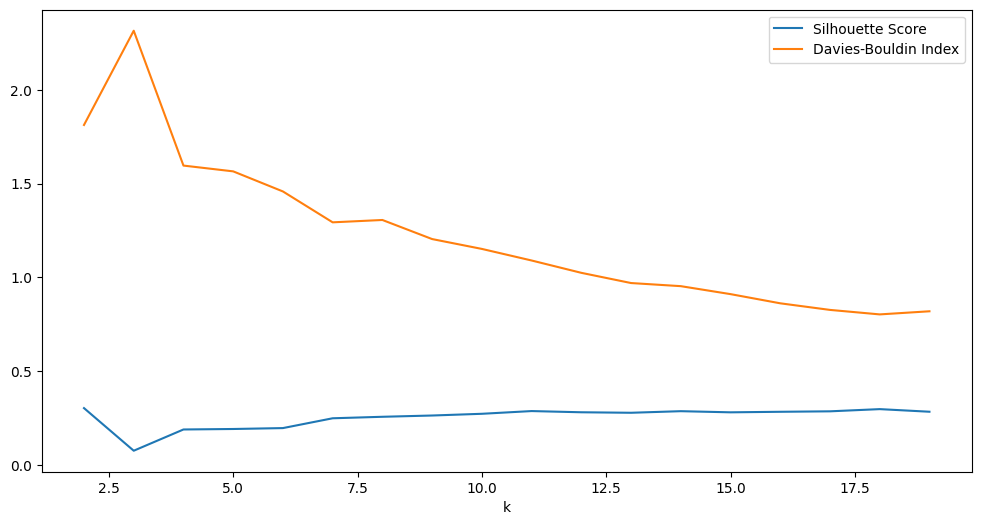

In [32]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         0     92               NaN   
4    1.52            3         1     88               NaN   
5    1.78            3         2     84         -0.107947   
6    2.03            3         2     84         -0.107947   
7    2.29            3         4     75         -0.105609   
8    2.54            3         4     71         -0.062713   
9    2.80            3         4     70         -0.052534   
10   3.05            3         5     64         -0.025520   
11   3.31            3         5     64         -0.025520   
12   3.56            3         5     64         -0.025520   
13   3.82            3         5     63         -0.019736   
14   4.07            3         5     59         -0.005095   
15   4.33            3         5     59         -0.005095   
16   4.58            3         6     56          0.007231   
17   4.84            3         7     51          0.027194   
18   5.09            3         7     50          0.032100   
19   5.35            3         5     49          0.067609   
20   5.60            3         5     46          0.093401   
21   5.86            3         5     46          0.093401   
22   6.11            3         5     41          0.109714   
23   6.37            3         6     37          0.109300   
24   6.62            3         6     33          0.129430   
25   6.88            3         8     26          0.172885   
26   7.13            3         8     25          0.181275   
27   7.39            3         8     24          0.186239   
28   7.64            3         8     24          0.186239   
29   7.90            3         8     22          0.196636   
30   8.15            3         7     21          0.181157   
31   8.41            3         7     21          0.181157   
32   8.66            3         6     20          0.196751   
33   8.92            3         6     20          0.196751   
34   9.17            3         6     19          0.196294   
35   9.43            3         6     19          0.196294   
36   9.68            3         5     19          0.190235   
37   9.94            3         4     19          0.151481   
38  10.19            3         4     16          0.161468   
39  10.45            3         3     16          0.167604   
40  10.70            3         3     15          0.165546   
41  10.96            3         2     15          0.160615   
42  11.21            3         2     12          0.164598   
43  11.47            3         2     12          0.164598   
44  11.72            3         1     12               NaN   
45  11.98            3         1     11               NaN   
46  12.23            3         1     10               NaN   
47  12.49            3         1      9               NaN   
48  12.74            3         1      9               NaN   
49  13.00            3         1      8               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5               1.111566  
6               1.111566  
7               1.212037  
8               1.244496  
9               1.286533  
10              1.301337  
11              1.301337  
12              1.301337  
13              1.337417  
14              1.388458  
15              1.388458  
16              1.379301  
17              1.427934  
18              1.440782  
19              1.518990  
20              1.541747  
21              1.541747  
22              1.504283  
23              1.559160  
24              1.543909  
25              1.620149  
26              1.594194  
27              1.609726  
28              1.609726  
29              1.601856  
30              1.569797  
31              1.569797  
32 

<Axes: xlabel='eps'>

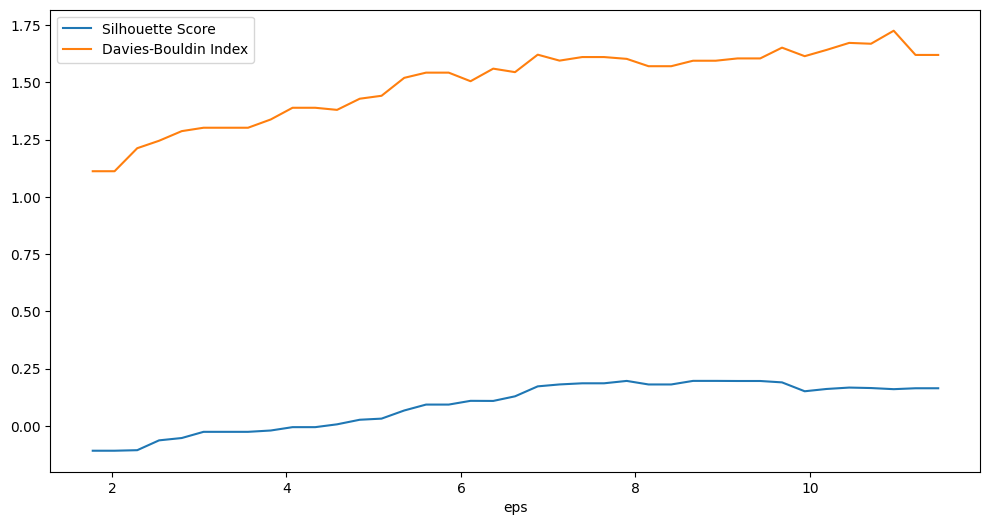

In [33]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

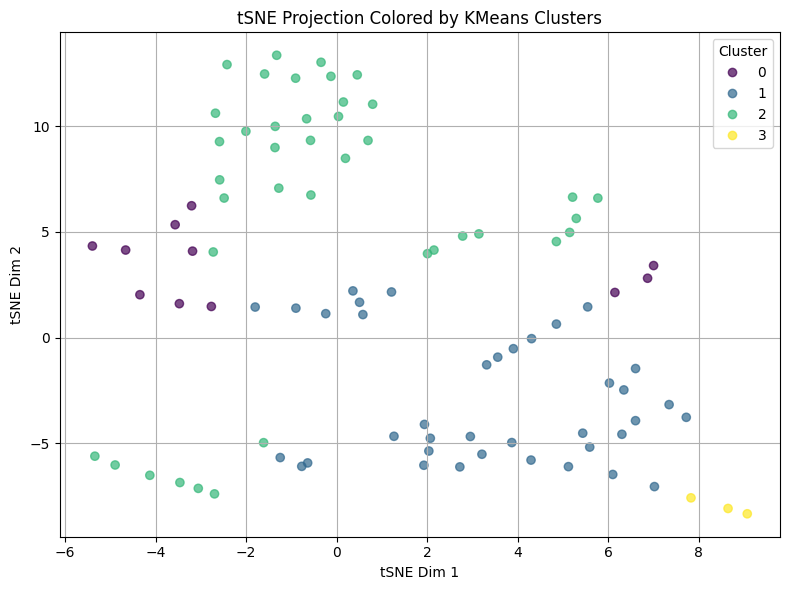

In [34]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         7    262          0.997004   
1    0.05            2         7    262          0.997004   
2    0.06            2         7    262          0.997004   
3    0.06            2         7    262          0.997004   
4    0.07            2         8    260          0.993611   
..    ...          ...       ...    ...               ...   
195  0.98            2        19    110         -0.094211   
196  0.99            2        19    110         -0.094211   
197  0.99            2        19    110         -0.094211   
198  1.00            2        19    110         -0.094211   
199  1.00            2        19    110         -0.094211   

     Davies-Bouldin Index  
0                0.004060  
1                0.004060  
2                0.004060  
3                0.004060  
4                0.009225  
..                    ...  
195              0.836043  
196              0.836043  
197              0.836043  
198              0.836043  
199              0.836043  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

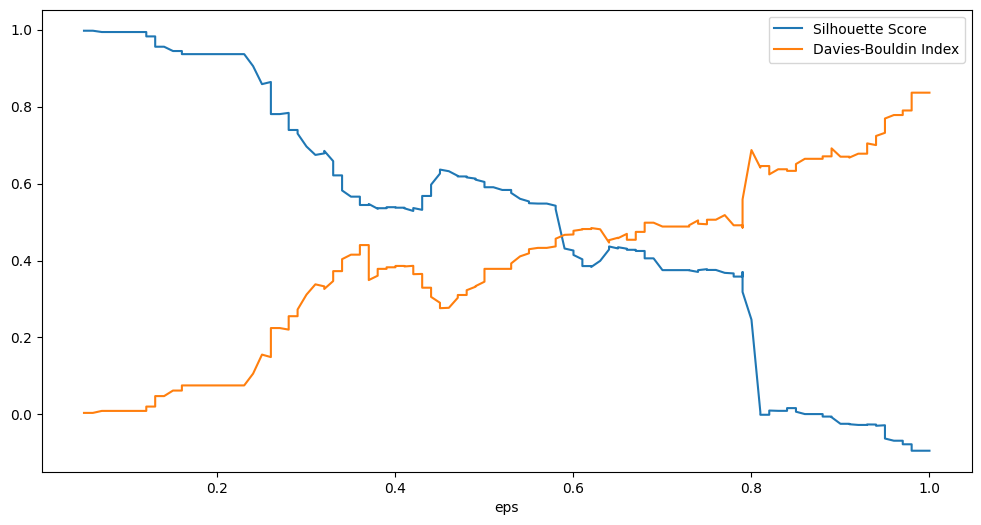

In [35]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [36]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [37]:
#Start with spring and work our way down to winter
season = 3
season_year = 2012
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2012-09-01 to 2012-11-30
Columns: 277 entries, 10000009 to 9000015
dtypes: float64(277)
memory usage: 197.6 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2012-09-01  0.620678  0.571343  0.213639  0.632507  0.367879  0.362150   
2012-09-02  0.603598  0.555246  0.208027  0.634779  0.367366  0.361646   
2012-09-03  0.602692  0.544427  0.204160  0.657342  0.368041  0.362310   
2012-09-04  0.594987  0.530752  0.199395  0.721591  0.365736  0.360041   
2012-09-05  0.586862  0.524433  0.197251  0.689553  0.360414  0.354802   
...              ...       ...       ...       ...       ...       ...   
2012-11-26  1.341211  1.039737  1.156738  1.211224  0.834942  0.821940   
2012-11-27  1.484055  0.820258  0.725959  1.110721  0.592791  0.583560   
2012-11-28  1.076469  0.636502  0.467433  0.958984  0.538982  0.530589   
2012-11-29  0.959149  0.595427  0.379004  0.894575  0.514071  0.506066   
2012-11-30  0.901976  0.550795  0.325938  0.871504  0.494863  0.487158   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2012-09-01  0.507628  0.535963  

          2012-09-01  2012-09-02  2012-09-03  2012-09-04  2012-09-05  \
10000009    0.326944    0.327288    0.340038    0.347238    0.337008   
10000010    0.215720    0.217070    0.207244    0.199459    0.193749   
10000011   -0.590712   -0.574411   -0.568274   -0.562868   -0.557048   
10000014    0.353613    0.398363    0.464596    0.638507    0.572655   
10000016   -0.242983   -0.211199   -0.194765   -0.180180   -0.182630   
...              ...         ...         ...         ...         ...   
67000019   -0.807316   -0.874449   -0.913371   -0.931091   -0.936041   
7000003    -0.363567   -0.362941   -0.352238   -0.328144   -0.330992   
8000001    -0.233102   -0.216213   -0.214105   -0.093511   -0.105676   
9000001     0.393578    0.466825    0.589307    0.733819    0.817162   
9000015     0.454449    0.525521    0.638761    0.773686    0.850418   

          2012-09-06  2012-09-07  2012-09-08  2012-09-09  2012-09-10  ...  \
10000009    0.331334    0.449887    0.500227    0.394997  

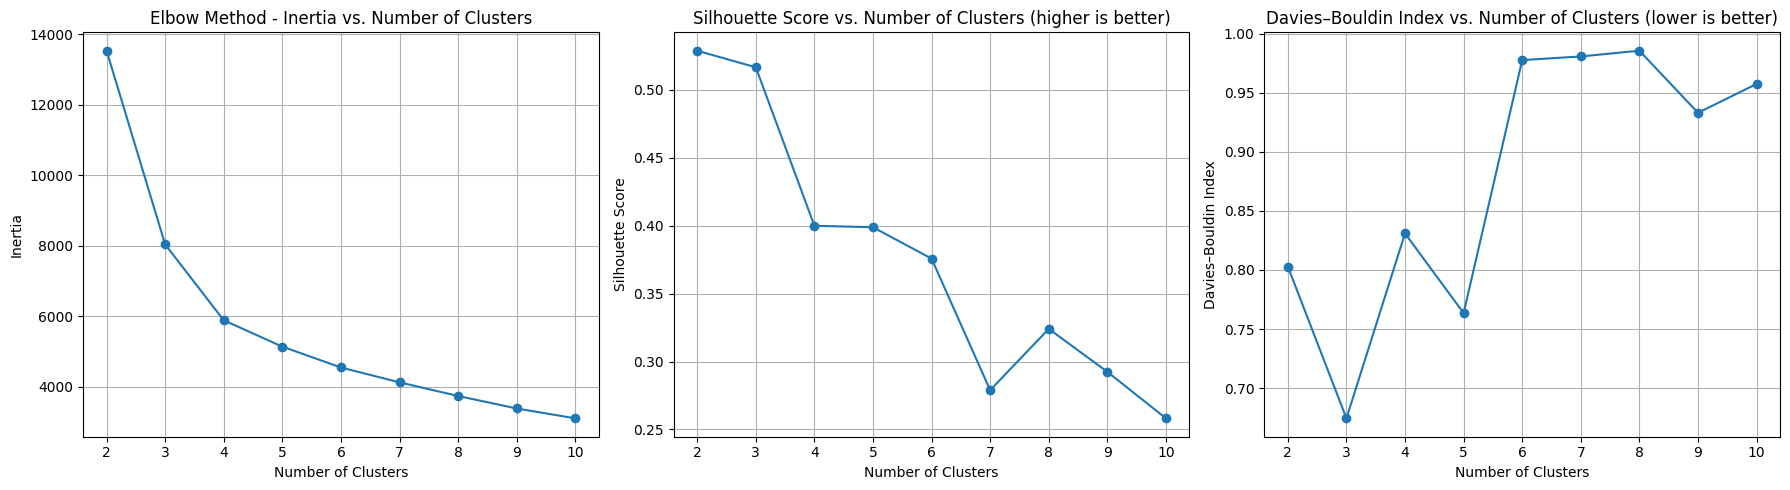

In [38]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2012-09-01  0.620678  0.571343  0.213639  0.632507  0.367879  0.362150   
2012-09-02  0.603598  0.555246  0.208027  0.634779  0.367366  0.361646   
2012-09-03  0.602692  0.544427  0.204160  0.657342  0.368041  0.362310   
2012-09-04  0.594987  0.530752  0.199395  0.721591  0.365736  0.360041   
2012-09-05  0.586862  0.524433  0.197251  0.689553  0.360414  0.354802   
...              ...       ...       ...       ...       ...       ...   
2012-11-26  1.341211  1.039737  1.156738  1.211224  0.834942  0.821940   
2012-11-27  1.484055  0.820258  0.725959  1.110721  0.592791  0.583560   
2012-11-28  1.076469  0.636502  0.467433  0.958984  0.538982  0.530589   
2012-11-29  0.959149  0.595427  0.379004  0.894575  0.514071  0.506066   
2012-11-30  0.901976  0.550795  0.325938  0.871504  0.494863  0.487158   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2012-09-01  0.507628  0.535963  

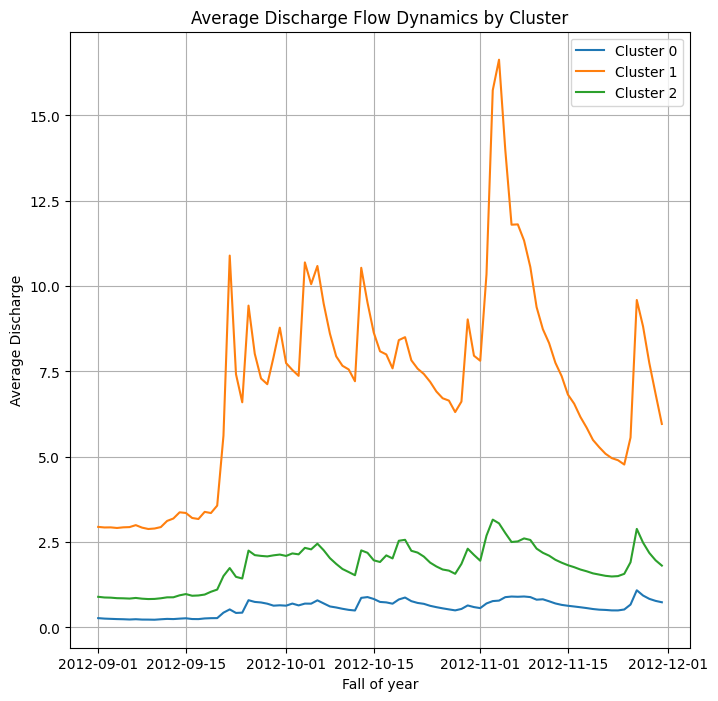

In [39]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [41]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2012-09-01  0.620678  0.571343  0.213639  0.632507  0.367879  0.362150   
2012-09-02  0.603598  0.555246  0.208027  0.634779  0.367366  0.361646   
2012-09-03  0.602692  0.544427  0.204160  0.657342  0.368041  0.362310   
2012-09-04  0.594987  0.530752  0.199395  0.721591  0.365736  0.360041   
2012-09-05  0.586862  0.524433  0.197251  0.689553  0.360414  0.354802   
...              ...       ...       ...       ...       ...       ...   
2012-11-26  1.341211  1.039737  1.156738  1.211224  0.834942  0.821940   
2012-11-27  1.484055  0.820258  0.725959  1.110721  0.592791  0.583560   
2012-11-28  1.076469  0.636502  0.467433  0.958984  0.538982  0.530589   
2012-11-29  0.959149  0.595427  0.379004  0.894575  0.514071  0.506066   
2012-11-30  0.901976  0.550795  0.325938  0.871504  0.494863  0.487158   

            11000011  11000016  12000001  12000195  ...  64000025  66000014  \
2012-09-01  0.507628  0.535963  0.404944  0.439387  ...  0.024675  0.555034   
2012-09-02  0.500086  0.524051  0.409734  0.424067  ...  0.023219  0.277985   
2012-09-03  0.497122  0.517833  0.411027  0.425194  ...  0.024698  0.188378   
2012-09-04  0.489270  0.510437  0.410096  0.424934  ...  0.025672  0.157211   
2012-09-05  0.493556  0.504357  0.408496  0.427770  ...  0.024913  0.133632   
...              ...       ...       ...       ...  ...       ...       ...   
2012-11-26  2.020940  2.789914  1.302339  1.969230  ...  0.182214  0.336011   
2012-11-27  2.066095  2.587677  0.966146  1.488558  ...  0.172113  0.501202   
2012-11-28  2.090884  2.286526  0.857661  1.158680  ...  0.159118  0.590262   
2012-11-29  2.115144  2.391730  0.807828  1.010966  ...  0.183721  0.557499   
2012-11-30  2.124123  2.322573  0.774665  0.932929  ...  0.175914  0.545619   

            66000034  67000017  67000018  67000019   7000003   8000001  \
2012-09-01  0.659163  0.030796  0.204986  0.117562  0.314392  0.372262   
2012-09-02  0.584668  0.024704  0.159175  0.076401  0.300798  0.365167   
2012-09-03  0.515552  0.022950  0.118227  0.052746  0.298948  0.359555   
2012-09-04  0.464577  0.022514  0.089279  0.039341  0.301421  0.403408   
2012-09-05  0.430472  0.021548  0.070658  0.032093  0.295761  0.393949   
...              ...       ...       ...       ...       ...       ...   
2012-11-26  1.170577  0.240263  0.433300  0.674140  2.750286  1.961249   
2012-11-27  2.169910  0.390717  0.789944  0.809251  2.833450  1.938359   
2012-11-28  2.352047  0.528744  0.852547  0.764682  2.357579  1.540245   
2012-11-29  2.037961  0.456815  0.744573  0.745182  1.812796  1.275442   
2012-11-30  1.831348  0.459223  0.673594  0.758550  1.441143  1.141769   

             9000001   9000015  
2012-09-01  0.650235  0.677234  
2012-09-02  0.664813  0.690563  
2012-09-03  0.712061  0.733759  
2012-09-04  0.763020  0.780349  
2012-09-05  0.796104  0.810596  
...              ...       ...  
2012-11-26  3.397217  3.188674  
2012-11-27  3.292216  3.092676  
2012-11-28  2.912797  2.745791  
2012-11-29  2.962886  2.791585  
2012-11-30  2.946879  2.776951  

[91 rows x 277 columns]

<Axes: >

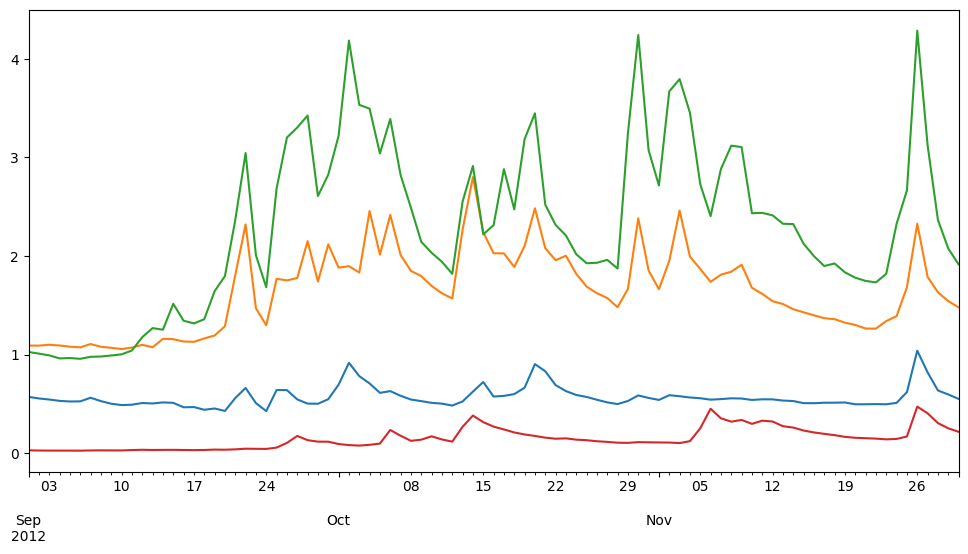

In [42]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

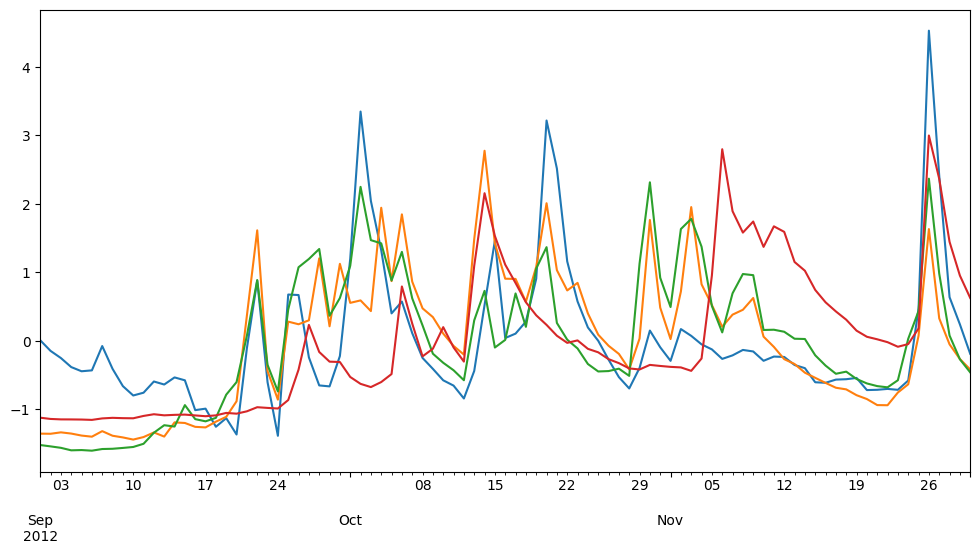

In [43]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

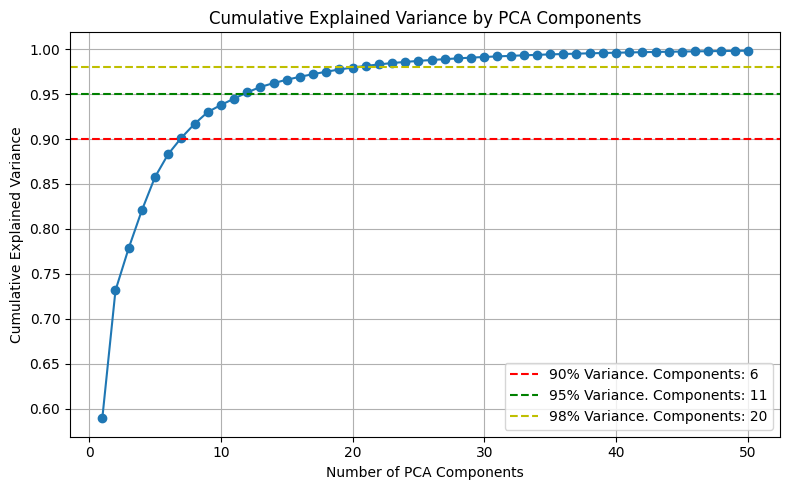

In [44]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-1.95026340e+01,  1.99319902e+00,  1.67977015e+00, ...,
         5.28698818e-01,  1.45369579e+00,  2.10706581e+00],
       [-2.02573535e+01,  1.97420663e+00,  1.44048397e+00, ...,
         1.72225880e-01,  9.82484529e-01,  1.72639431e+00],
       [-2.05547686e+01,  1.90030818e+00,  1.18319925e+00, ...,
         1.17697892e-01,  8.38140368e-01,  1.51588195e+00],
       ...,
       [ 1.44423377e+01,  7.18238768e+00,  3.70197761e+00, ...,
        -1.51015637e+00,  5.08130999e-01,  3.04324014e-01],
       [ 1.06125182e+01,  8.18813087e+00,  2.89925126e+00, ...,
        -8.60371206e-01,  6.07058508e-01, -6.41961805e-02],
       [ 8.28573885e+00,  8.82259323e+00,  2.21688114e+00, ...,
        -2.92475632e-03,  1.42382445e+00, -9.39989591e-01]],
      shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_39220\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


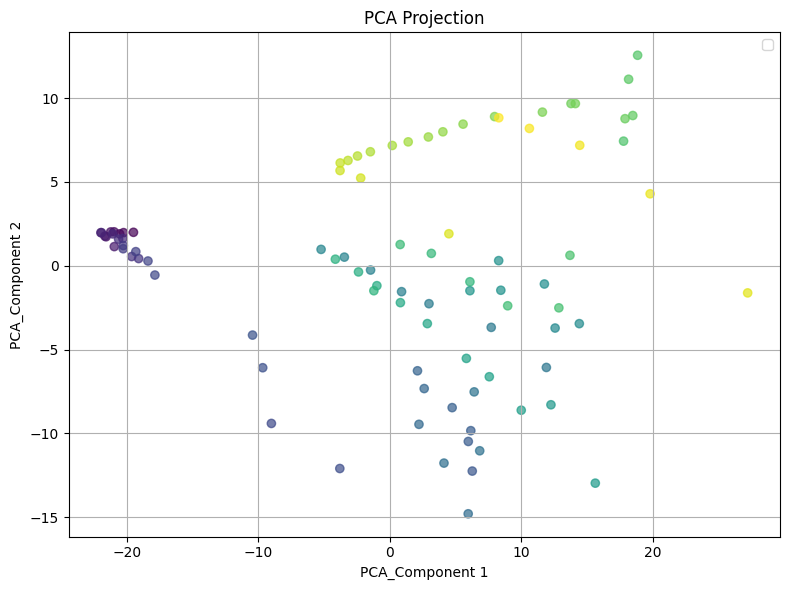

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_39220\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


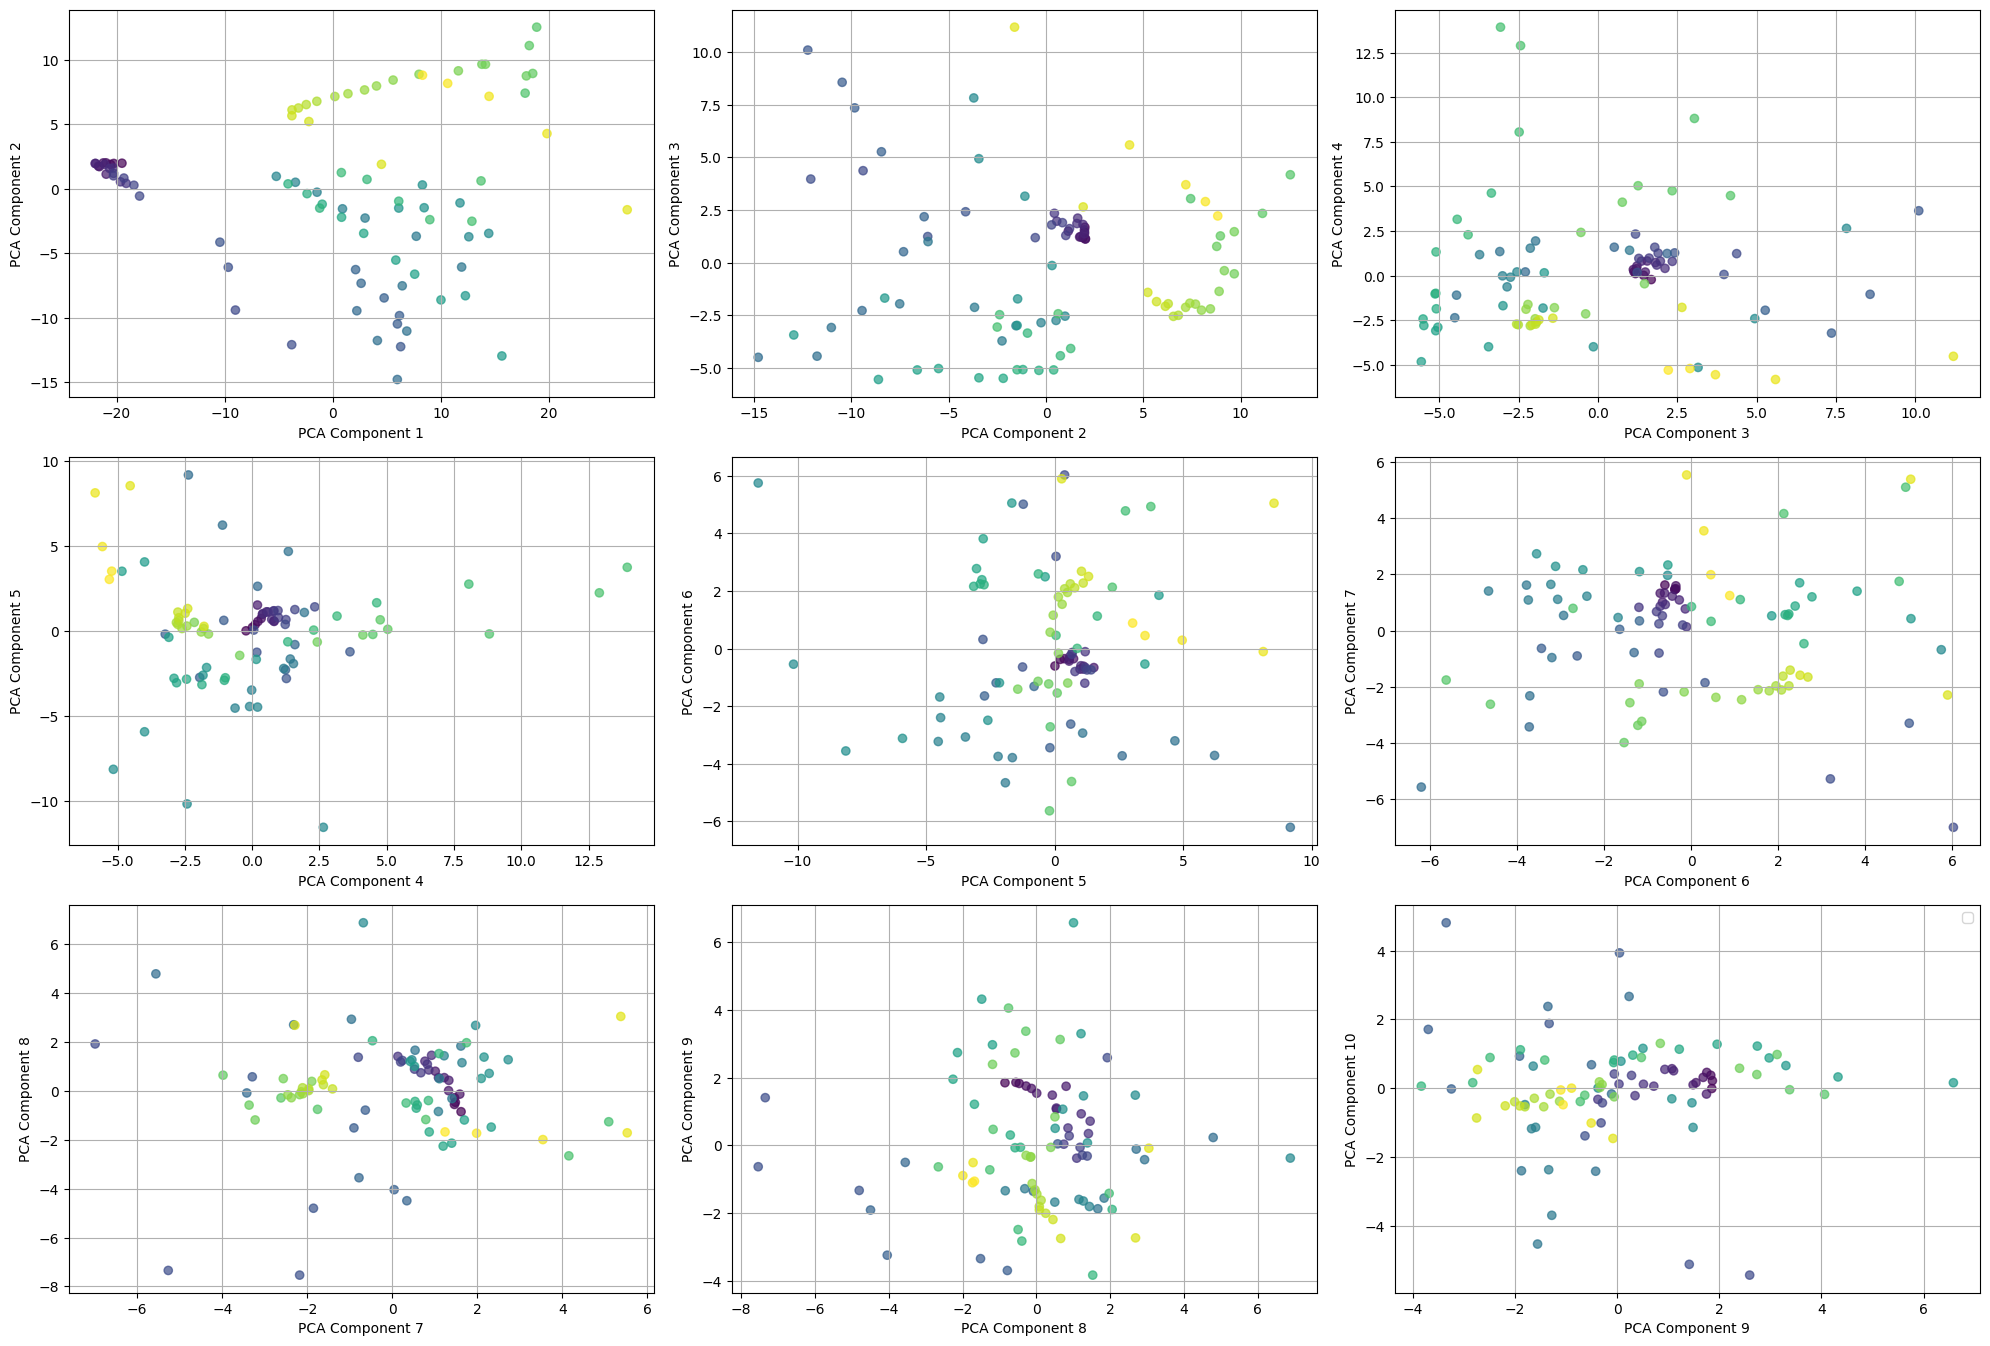

In [47]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.353
KMeans Davies-Bouldin Index is 1.177


<Axes: xlabel='k'>

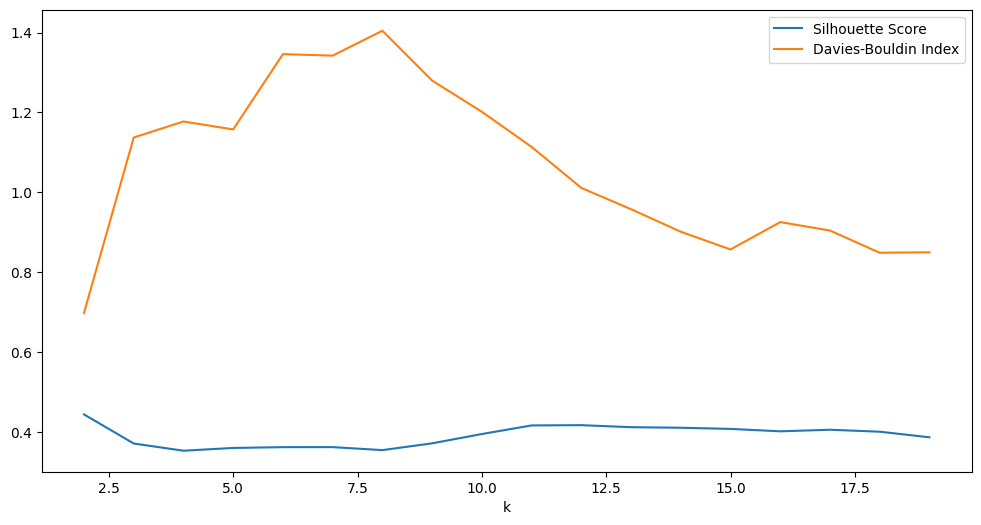

In [49]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         1     87               NaN   
2    1.01            3         1     87               NaN   
3    1.27            3         3     79         -0.134507   
4    1.52            3         2     73          0.018688   
5    1.78            3         3     66          0.069932   
6    2.03            3         3     62          0.107388   
7    2.29            3         3     57          0.172202   
8    2.54            3         3     57          0.172202   
9    2.80            3         4     54          0.194875   
10   3.05            3         4     52          0.206339   
11   3.31            3         4     51          0.207023   
12   3.56            3         4     51          0.207023   
13   3.82            3         4     50          0.213266   
14   4.07            3         4     50          0.213266   
15   4.33            3         4     47          0.214995   
16   4.58            3         4     46          0.214738   
17   4.84            3         4     46          0.214738   
18   5.09            3         6     39          0.239182   
19   5.35            3         7     36          0.257088   
20   5.60            3         6     36          0.212452   
21   5.86            3         7     30          0.216457   
22   6.11            3         7     29          0.219538   
23   6.37            3         8     26          0.225845   
24   6.62            3         8     25          0.224411   
25   6.88            3         8     24          0.233206   
26   7.13            3         8     24          0.233206   
27   7.39            3         7     22          0.232890   
28   7.64            3         6     17          0.261808   
29   7.90            3         6     16          0.262897   
30   8.15            3         6     16          0.262897   
31   8.41            3         6     16          0.262897   
32   8.66            3         5     16          0.261086   
33   8.92            3         5     15          0.276535   
34   9.17            3         4     14          0.306462   
35   9.43            3         2     14          0.316887   
36   9.68            3         2     14          0.316887   
37   9.94            3         2     12          0.323169   
38  10.19            3         2      9          0.338559   
39  10.45            3         2      8          0.356891   
40  10.70            3         2      8          0.356891   
41  10.96            3         2      8          0.356891   
42  11.21            3         2      7          0.367352   
43  11.47            3         2      7          0.367352   
44  11.72            3         3      4          0.314275   
45  11.98            3         3      4          0.314275   
46  12.23            3         2      4          0.364153   
47  12.49            3         2      4          0.364153   
48  12.74            3         2      2          0.391031   
49  13.00            3         2      2          0.391031   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.067907  
4               1.146115  
5               1.159797  
6               1.156185  
7               1.127889  
8               1.127889  
9               1.105661  
10              1.162717  
11              1.175104  
12              1.175104  
13              1.200436  
14              1.200436  
15              1.322598  
16              1.398775  
17              1.398775  
18              1.309231  
19              1.333633  
20              1.422287  
21              1.508278  
22              1.486516  
23              1.557514  
24              1.628458  
25              1.624658  
26              1.624658  
27              1.702172  
28              1.961270  
29              1.962025  
30              1.962025  
31              1.962025  
32 

<Axes: xlabel='eps'>

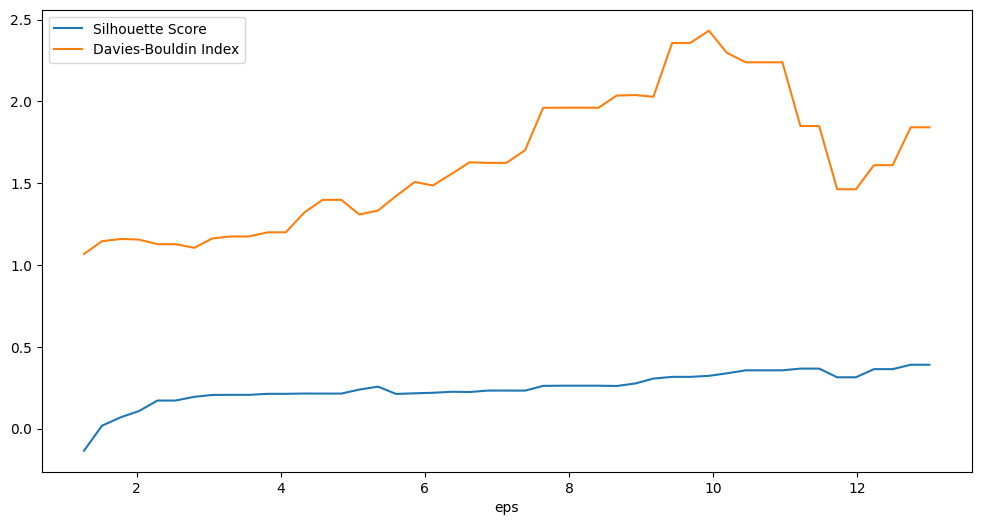

In [50]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

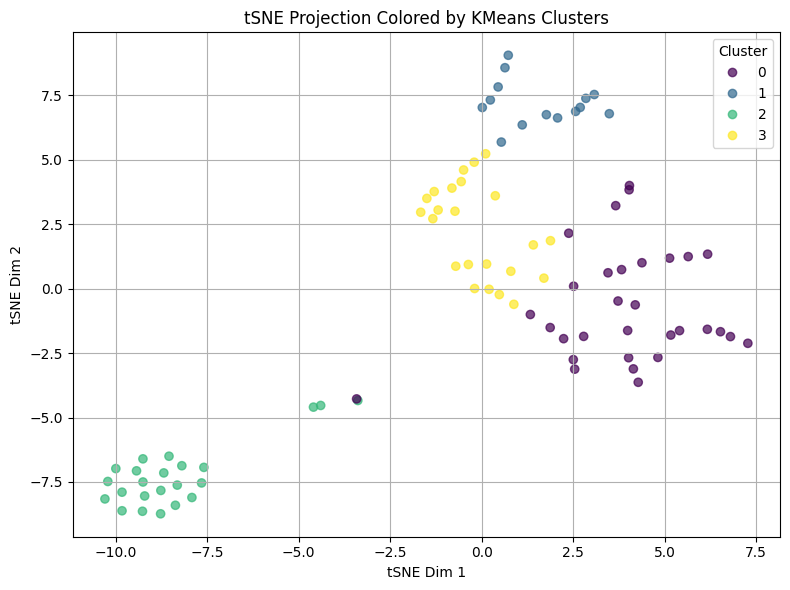

In [51]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    265          0.996238   
1    0.05            2         6    265          0.996238   
2    0.06            2         6    265          0.996238   
3    0.06            2         6    265          0.996238   
4    0.07            2         6    265          0.996238   
..    ...          ...       ...    ...               ...   
195  0.98            2        27    108          0.188593   
196  0.99            2        28    104          0.193662   
197  0.99            2        30    100          0.198964   
198  1.00            2        30    100          0.198964   
199  1.00            2        30    100          0.198964   

     Davies-Bouldin Index  
0                0.003911  
1                0.003911  
2                0.003911  
3                0.003911  
4                0.003911  
..                    ...  
195              0.557501  
196              0.558947  
197              0.556879  
198              0.556879  
199              0.556879  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

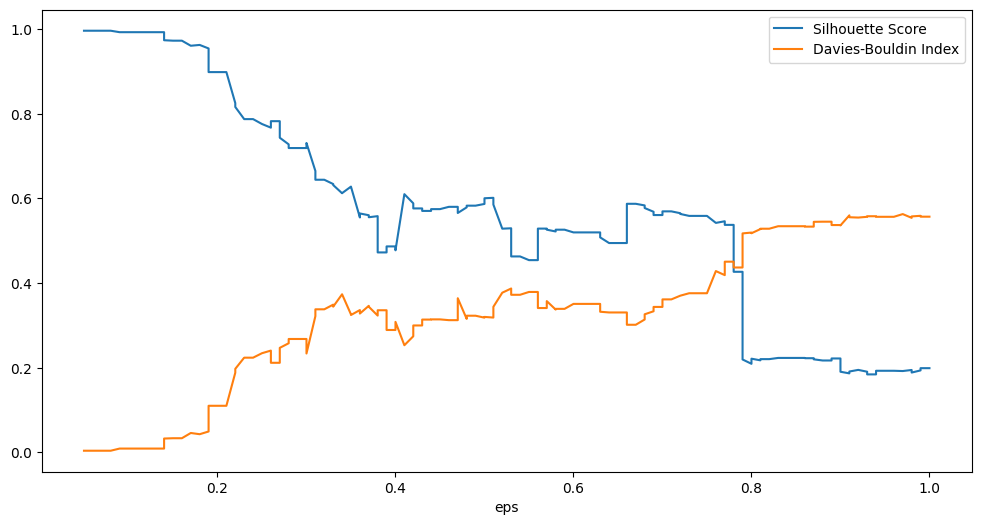

In [52]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [53]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [54]:
season = 4
season_year = 2012
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2012-12-01 to 2013-02-28
Columns: 249 entries, 10000009 to 9000015
dtypes: float64(249)
memory usage: 175.8 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2012-12-01  0.857896  0.543031  0.277168  0.852302  0.485159  0.477605   
2012-12-02  0.835839  0.533479  0.257987  0.840816  0.473276  0.465907   
2012-12-03  0.813074  0.524579  0.304907  0.834155  0.474935  0.467539   
2012-12-04  0.821494  0.535783  0.314147  0.843630  0.481162  0.473670   
2012-12-05  0.816860  0.553889  0.307987  0.831124  0.472820  0.465458   
...              ...       ...       ...       ...       ...       ...   
2013-02-24  0.813098  0.642238  0.460056  0.788492  0.486681  0.479102   
2013-02-25  0.806259  0.631582  0.439324  0.794758  0.485303  0.477746   
2013-02-26  0.800153  0.626512  0.423343  0.786459  0.473821  0.466443   
2013-02-27  0.791907  0.626870  0.416176  0.782142  0.469127  0.461822   
2013-02-28  0.798605  0.635131  0.414533  0.793853  0.478975  0.471517   

            11000011  11000016  12000001  12000195  ...  63000007  64000025  \
2012-12-01  2.121120  1.977439  

          2012-12-01  2012-12-02  2012-12-03  2012-12-04  2012-12-05  \
10000009   -0.192885   -0.197435   -0.194950   -0.211169   -0.178485   
10000010   -0.612627   -0.584115   -0.593780   -0.602164   -0.542813   
10000011   -0.967044   -0.936435   -0.897466   -0.905474   -0.883493   
10000014   -0.200342   -0.191070   -0.165807   -0.180876   -0.158724   
10000016   -0.689774   -0.661107   -0.662411   -0.676914   -0.655128   
...              ...         ...         ...         ...         ...   
67000018   -0.600851   -0.599083   -0.553971    0.248915    1.560772   
7000003     0.291819    0.070504   -0.040819   -0.160729   -0.142839   
8000001     0.009578   -0.124563   -0.217837   -0.323642   -0.331273   
9000001     2.449316    2.162027    2.296694    2.178693    2.067124   
9000015     2.235014    1.973889    2.101068    1.990625    1.892184   

          2012-12-06  2012-12-07  2012-12-08  2012-12-09  2012-12-10  ...  \
10000009   -0.136058   -0.109185   -0.055369   -0.091862  

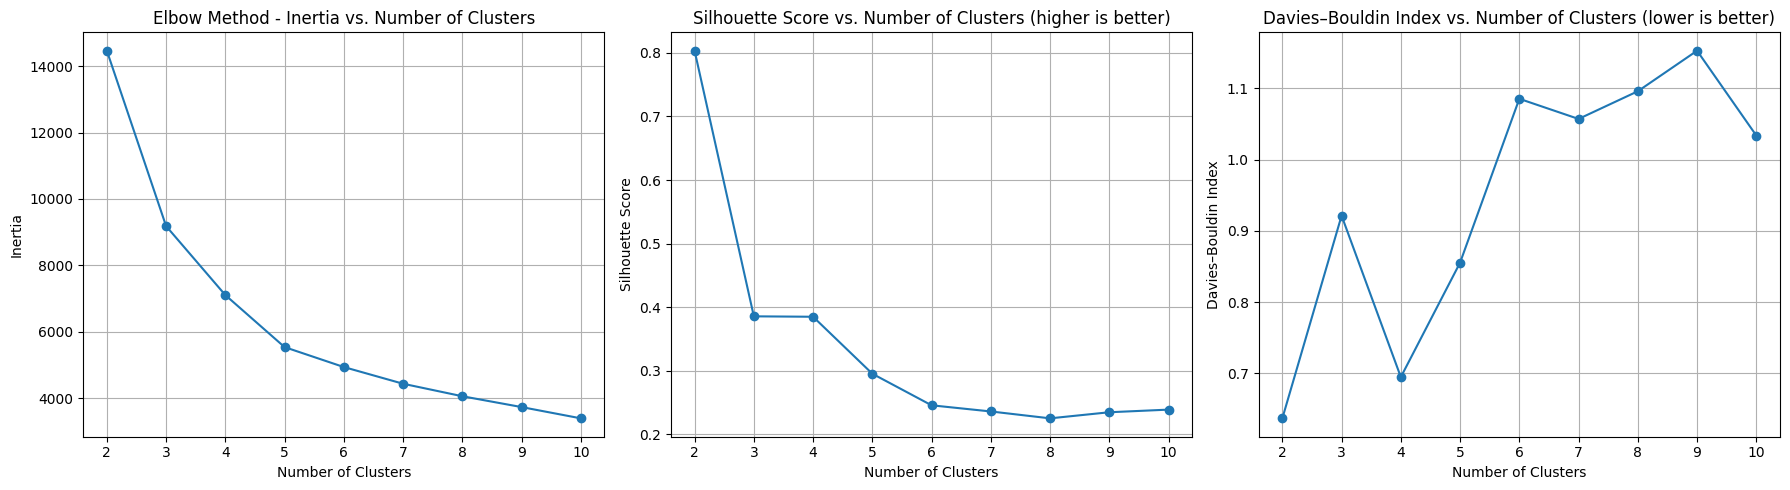

In [55]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
10000010        1
10000011        1
10000014        1
10000016        1

            10000009  10000010  10000011  10000014  10000016  10000017  \
2012-12-01  0.857896  0.543031  0.277168  0.852302  0.485159  0.477605   
2012-12-02  0.835839  0.533479  0.257987  0.840816  0.473276  0.465907   
2012-12-03  0.813074  0.524579  0.304907  0.834155  0.474935  0.467539   
2012-12-04  0.821494  0.535783  0.314147  0.843630  0.481162  0.473670   
2012-12-05  0.816860  0.553889  0.307987  0.831124  0.472820  0.465458   
...              ...       ...       ...       ...       ...       ...   
2013-02-24  0.813098  0.642238  0.460056  0.788492  0.486681  0.479102   
2013-02-25  0.806259  0.631582  0.439324  0.794758  0.485303  0.477746   
2013-02-26  0.800153  0.626512  0.423343  0.786459  0.473821  0.466443   
2013-02-27  0.791907  0.626870  0.416176  0.782142  0.469127  0.461822   
2013-02-28  0.798605  0.635131  0.414533  0.793853  0.478975  0.471517   

            11000011  11000016  12000001  12000195  ...  63000007  64000025  \
2012-12-01  2.121120  1.977439  

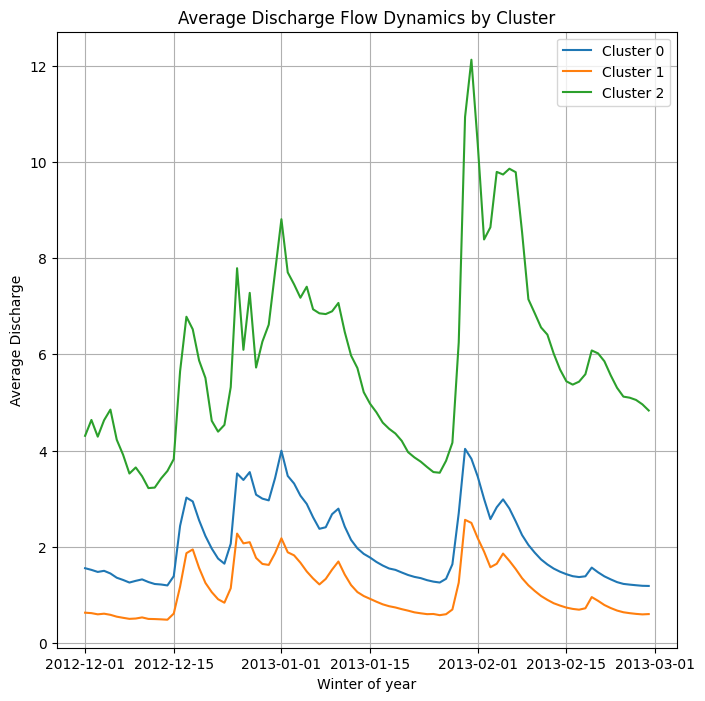

In [56]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [58]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2012-12-01  0.857896  0.543031  0.277168  0.852302  0.485159  0.477605   
2012-12-02  0.835839  0.533479  0.257987  0.840816  0.473276  0.465907   
2012-12-03  0.813074  0.524579  0.304907  0.834155  0.474935  0.467539   
2012-12-04  0.821494  0.535783  0.314147  0.843630  0.481162  0.473670   
2012-12-05  0.816860  0.553889  0.307987  0.831124  0.472820  0.465458   
...              ...       ...       ...       ...       ...       ...   
2013-02-24  0.813098  0.642238  0.460056  0.788492  0.486681  0.479102   
2013-02-25  0.806259  0.631582  0.439324  0.794758  0.485303  0.477746   
2013-02-26  0.800153  0.626512  0.423343  0.786459  0.473821  0.466443   
2013-02-27  0.791907  0.626870  0.416176  0.782142  0.469127  0.461822   
2013-02-28  0.798605  0.635131  0.414533  0.793853  0.478975  0.471517   

            11000011  11000016  12000001  12000195  ...  63000007  64000025  \
2012-12-01  2.121120  1.977439  0.740444  0.889161  ...  0.282735  0.143454   
2012-12-02  2.095601  1.831095  0.715963  0.846245  ...  0.295254  0.160962   
2012-12-03  2.054840  1.641865  0.707131  0.778236  ...  0.309803  0.173134   
2012-12-04  1.904379  1.585965  0.711468  0.812477  ...  0.392919  0.236611   
2012-12-05  1.869483  1.513086  0.695058  0.843025  ...  0.499287  0.255637   
...              ...       ...       ...       ...  ...       ...       ...   
2013-02-24  1.359175  1.123836  0.448546  0.495744  ...  0.662254  0.704126   
2013-02-25  1.324019  1.085530  0.439181  0.442638  ...  0.598847  0.593434   
2013-02-26  1.286272  1.082776  0.434291  0.447937  ...  0.555488  0.518237   
2013-02-27  1.257072  1.087254  0.432517  0.501510  ...  0.531997  0.489789   
2013-02-28  1.228665  1.077262  0.437994  0.684039  ...  0.528915  0.483588   

            66000014  66000034  67000017  67000018   7000003   8000001  \
2012-12-01  0.476308  1.477577  0.414788  0.551864  1.221491  1.009771   
2012-12-02  0.450201  1.390384  0.374761  0.521775  1.045350  0.892820   
2012-12-03  0.447005  1.481904  0.345418  0.553376  0.924566  0.796519   
2012-12-04  0.668267  2.882214  0.456709  1.157689  0.858351  0.739307   
2012-12-05  1.091856  5.012886  0.983650  2.072251  0.842589  0.706578   
...              ...       ...       ...       ...       ...       ...   
2013-02-24  1.078300  1.442570  1.314116  1.040845  0.688601  0.783761   
2013-02-25  1.191636  1.870365  1.672661  1.118185  0.630520  0.744336   
2013-02-26  1.400897  2.144091  2.077751  1.232670  0.598809  0.712219   
2013-02-27  1.539328  2.134909  2.188248  1.559815  0.594662  0.701300   
2013-02-28  1.470719  1.734301  1.919501  1.617542  0.604154  0.699830   

             9000001   9000015  
2012-12-01  2.839917  2.679160  
2012-12-02  2.680789  2.533677  
2012-12-03  2.615413  2.473906  
2012-12-04  2.567827  2.430401  
2012-12-05  2.437735  2.311463  
...              ...       ...  
2013-02-24  1.540520  1.491182  
2013-02-25  1.524693  1.476711  
2013-02-26  1.505685  1.459333  
2013-02-27  1.490066  1.445054  
2013-02-28  1.503199  1.457060  

[90 rows x 249 columns]

<Axes: >

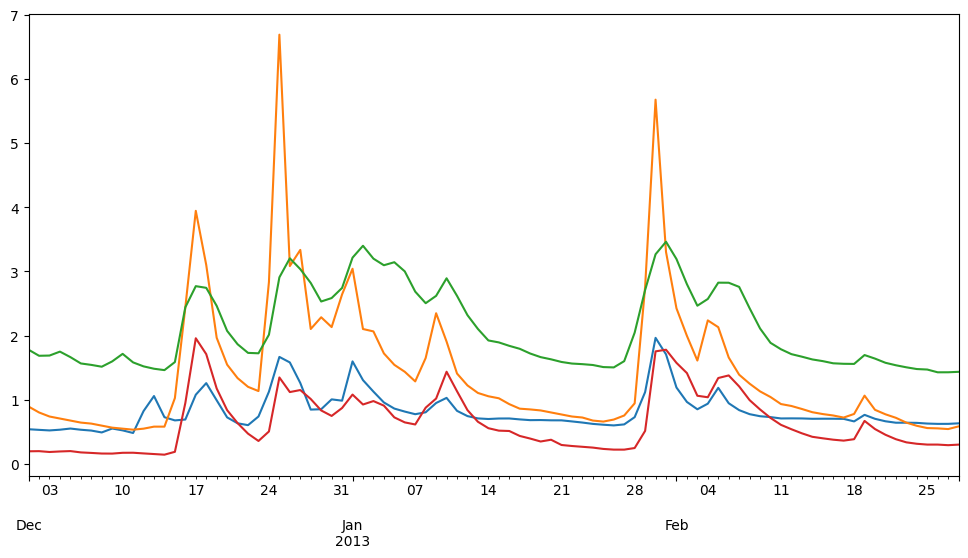

In [59]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

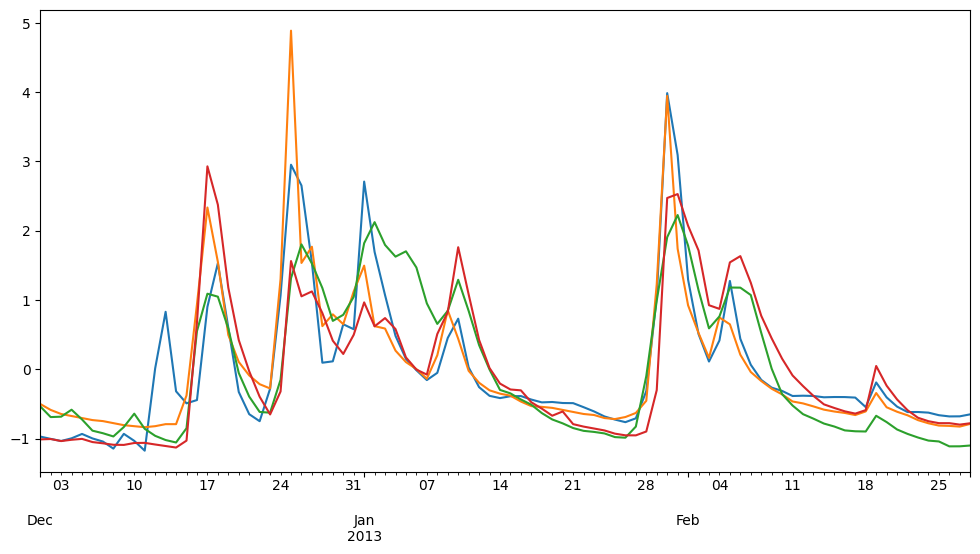

In [60]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

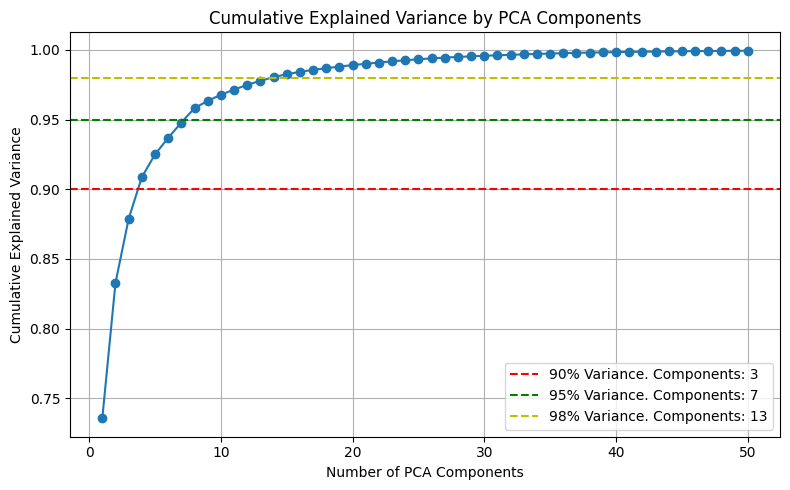

In [61]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-10.66367513,  -3.70249721,   3.01784564, ...,  -0.21568672,
         -0.18432843,  -0.89226264],
       [-11.29968089,  -3.53708978,   2.04756355, ...,  -0.24304978,
         -0.24109354,  -0.08650085],
       [-12.00117327,  -3.38751062,   1.99835083, ...,  -0.20256267,
         -0.16844731,  -0.28005807],
       ...,
       [-13.68964293,   0.49136384,  -3.4560746 , ...,  -0.20325434,
         -0.12090161,  -0.46059502],
       [-13.97263061,   0.34837223,  -3.62396812, ...,  -0.19565685,
         -0.05894222,  -0.54726988],
       [-13.84826333,   0.10203652,  -3.79173503, ...,  -0.16148908,
          0.10435906,  -0.53065442]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_39220\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


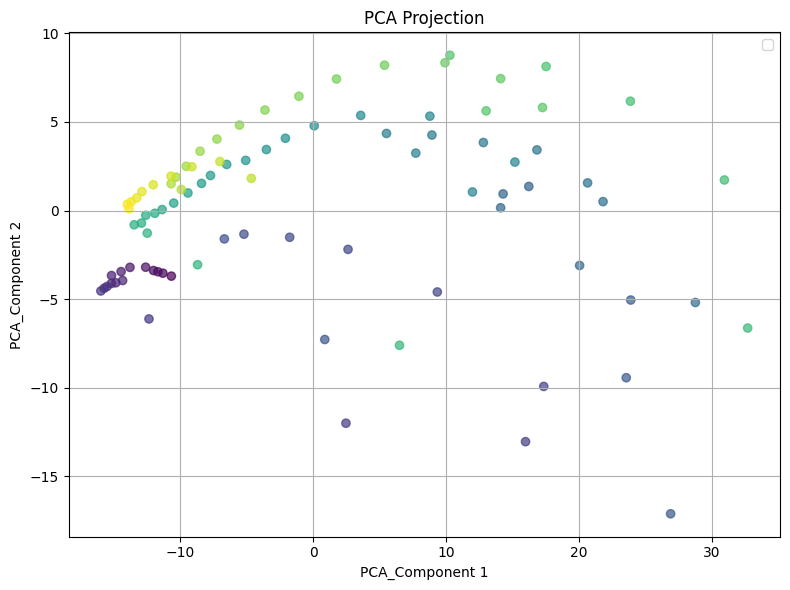

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_39220\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


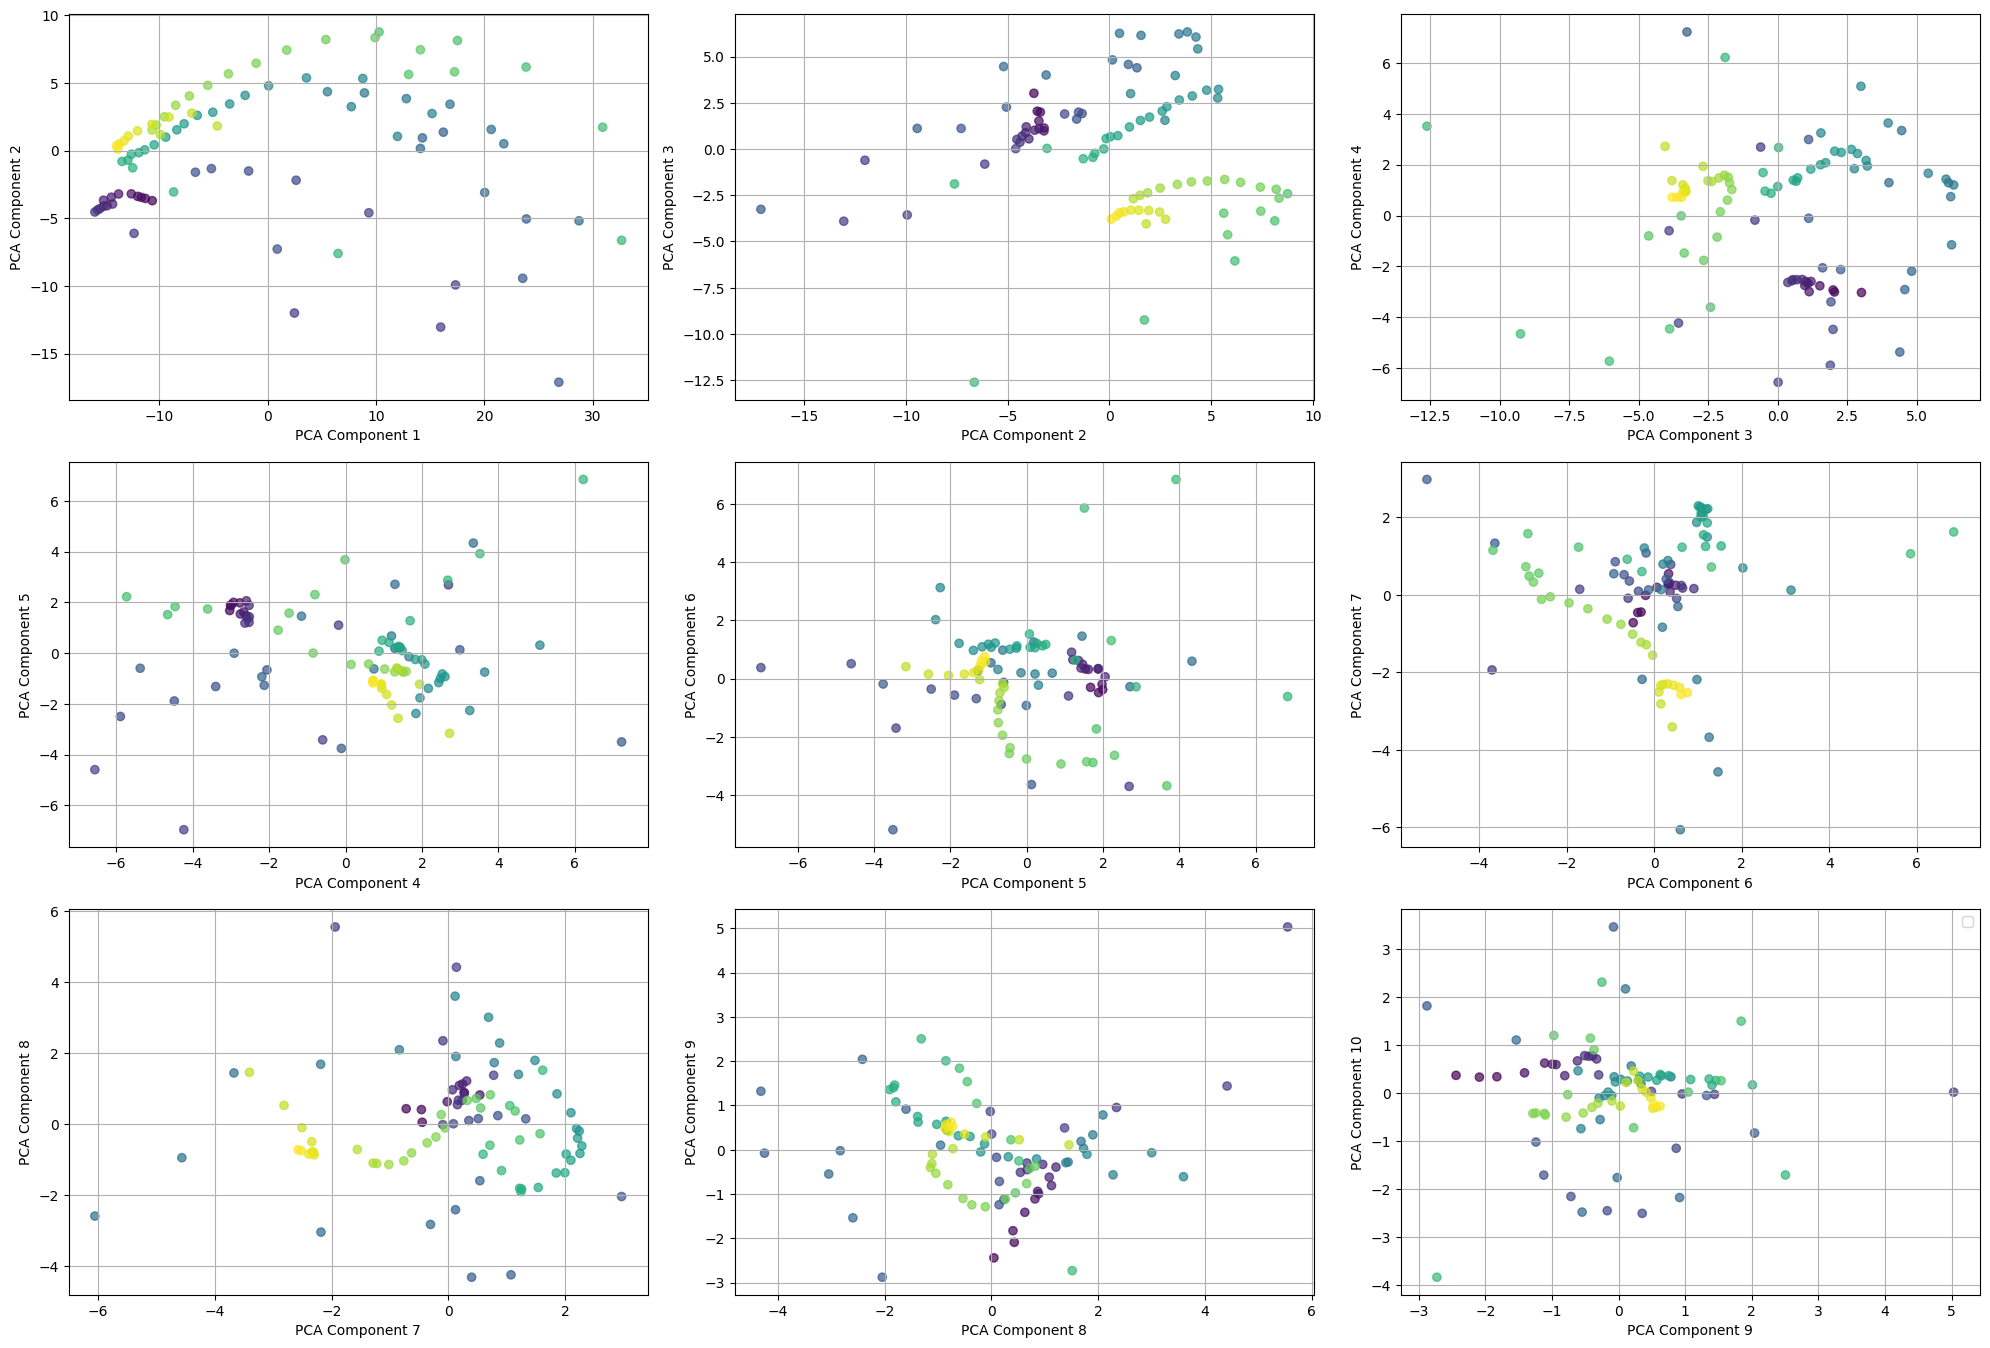

In [64]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.367
KMeans Davies-Bouldin Index is 1.225


<Axes: xlabel='k'>

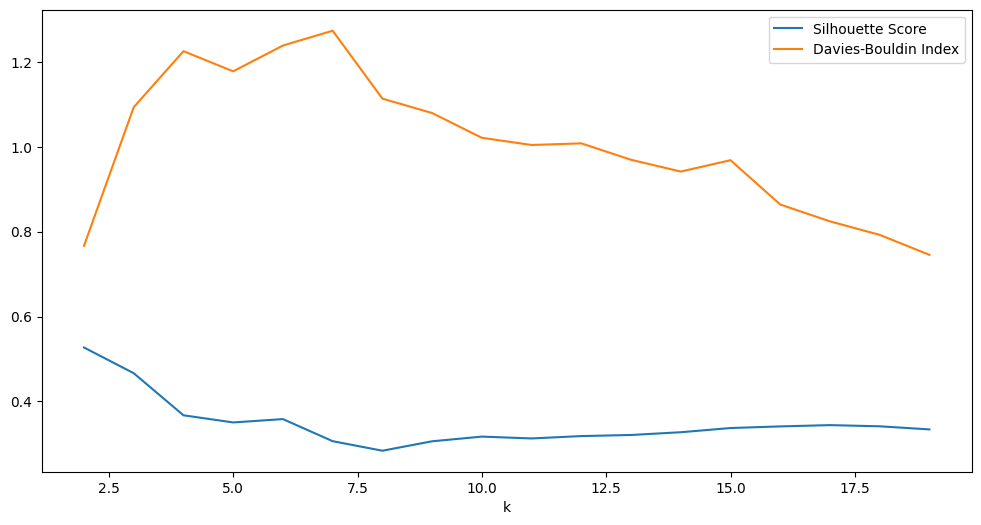

In [66]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         1     85               NaN   
2    1.01            3         1     85               NaN   
3    1.27            3         4     72         -0.050184   
4    1.52            3         7     62          0.037439   
5    1.78            3         5     54          0.159300   
6    2.03            3         4     50          0.187129   
7    2.29            3         4     47          0.213746   
8    2.54            3         3     45          0.254674   
9    2.80            3         3     43          0.265741   
10   3.05            3         3     43          0.265741   
11   3.31            3         3     42          0.258781   
12   3.56            3         3     41          0.266483   
13   3.82            3         4     37          0.260311   
14   4.07            3         4     36          0.249819   
15   4.33            3         6     30          0.129458   
16   4.58            3         6     25          0.124626   
17   4.84            3         6     24          0.119765   
18   5.09            3         5     22         -0.003243   
19   5.35            3         5     21          0.004732   
20   5.60            3         4     19         -0.017640   
21   5.86            3         4     18         -0.023456   
22   6.11            3         4     16         -0.020231   
23   6.37            3         4     16         -0.020231   
24   6.62            3         3     15         -0.089522   
25   6.88            3         3     15         -0.089522   
26   7.13            3         2     15          0.221871   
27   7.39            3         2     14          0.216851   
28   7.64            3         2     14          0.216851   
29   7.90            3         2     14          0.216851   
30   8.15            3         1     13               NaN   
31   8.41            3         1     13               NaN   
32   8.66            3         1     12               NaN   
33   8.92            3         1     12               NaN   
34   9.17            3         1     12               NaN   
35   9.43            3         1     12               NaN   
36   9.68            3         1     11               NaN   
37   9.94            3         1     11               NaN   
38  10.19            3         1     11               NaN   
39  10.45            3         1      9               NaN   
40  10.70            3         1      9               NaN   
41  10.96            3         1      8               NaN   
42  11.21            3         1      7               NaN   
43  11.47            3         1      7               NaN   
44  11.72            3         1      3               NaN   
45  11.98            3         1      3               NaN   
46  12.23            3         1      3               NaN   
47  12.49            3         1      3               NaN   
48  12.74            3         1      3               NaN   
49  13.00            3         1      3               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.041184  
4               0.920514  
5               0.823573  
6               0.896326  
7               0.950515  
8               1.060341  
9               1.107560  
10              1.107560  
11              1.160564  
12              1.158144  
13              1.145583  
14              1.195201  
15              1.434685  
16              1.665170  
17              1.658674  
18              1.992129  
19              1.982017  
20              1.620709  
21              1.621555  
22              1.568746  
23              1.568746  
24              1.825628  
25              1.825628  
26              1.361859  
27              1.331826  
28              1.331826  
29              1.331826  
30                   NaN  
31                   NaN  
32 

<Axes: xlabel='eps'>

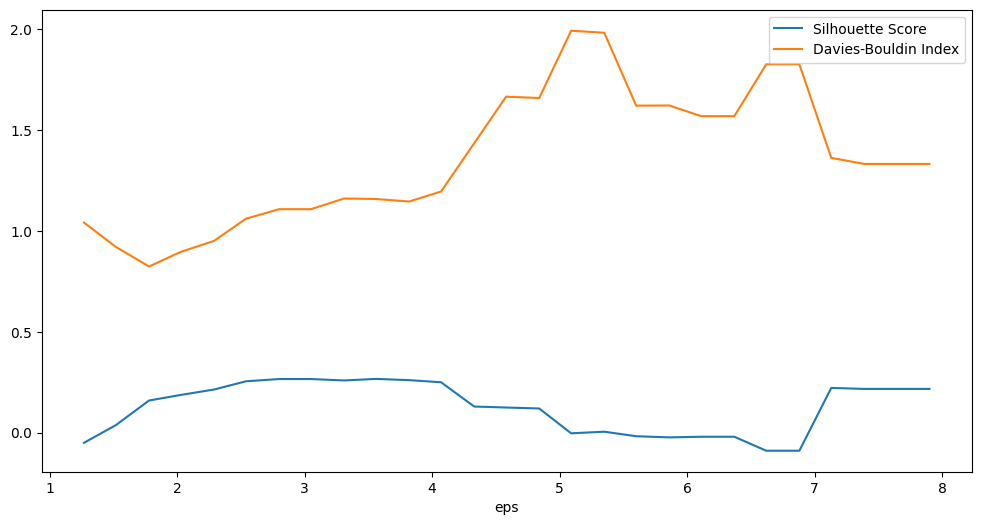

In [67]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

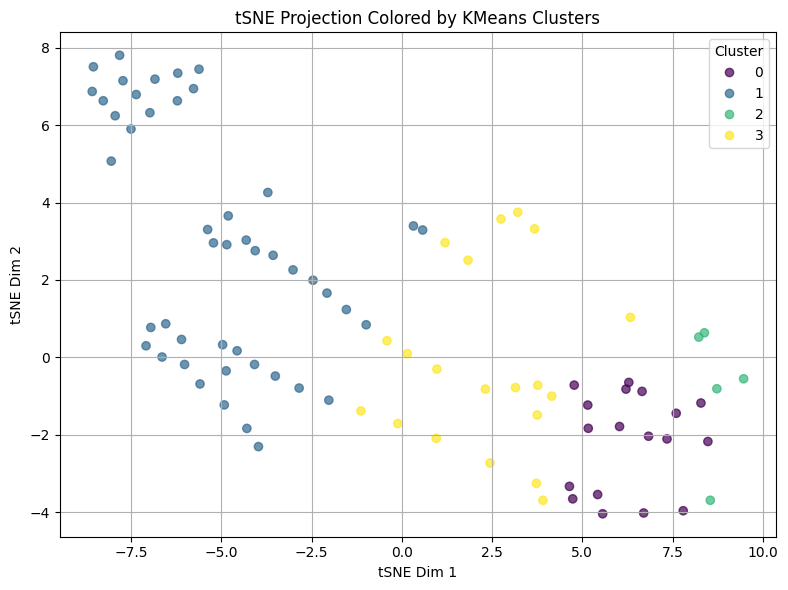

In [68]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         5    239          0.997655   
1    0.05            2         5    239          0.997655   
2    0.06            2         5    239          0.997655   
3    0.06            2         5    239          0.997655   
4    0.07            2         5    239          0.997655   
..    ...          ...       ...    ...               ...   
195  0.98            2        24    174          0.567297   
196  0.99            2        24    173          0.560016   
197  0.99            2        26    168          0.549383   
198  1.00            2        26    168          0.549383   
199  1.00            2        26    168          0.549383   

     Davies-Bouldin Index  
0                0.002925  
1                0.002925  
2                0.002925  
3                0.002925  
4                0.002925  
..                    ...  
195              0.410103  
196              0.425369  
197              0.445624  
198              0.445624  
199              0.445624  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

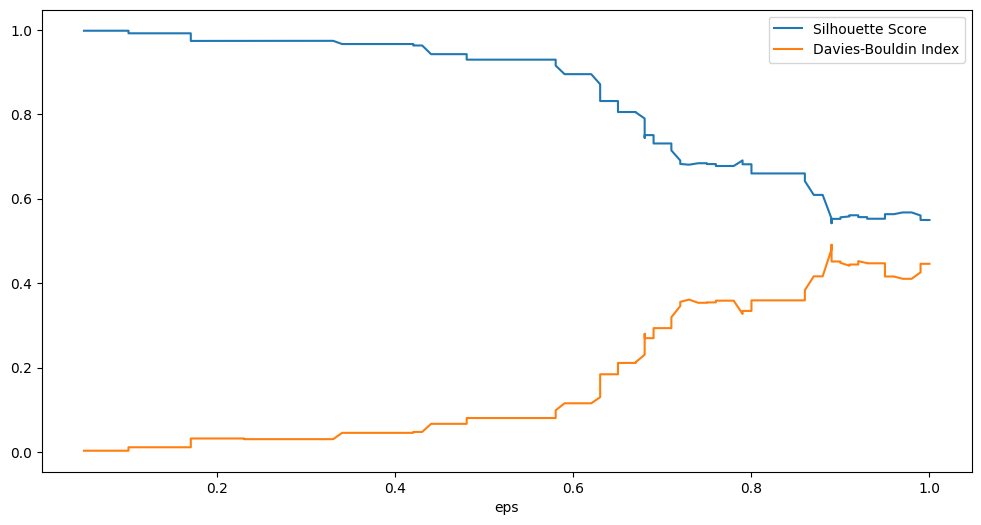

In [69]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))